In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.1.4 scikit-learn==1.2.2 statsmodels==0.14.0 igraph==0.11.5 pynndescent==0.5.12


In [3]:
vta1= sc.read_h5ad('./VTA_1/VTA_1_filter.h5ad')
vta2= sc.read_h5ad('./VTA_2/VTA_2_filter.h5ad')

In [15]:
vta1

AnnData object with n_obs × n_vars = 8799 × 23478
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden_res_0.50', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.50', 'Neuron'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [19]:
vta2= sc.read_h5ad('./VTA_2/VTA_2_clustering_ann.h5ad')

In [20]:
vta2

AnnData object with n_obs × n_vars = 14230 × 24406
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden_res_0.50', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.50', 'Neuron'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [21]:
adata = sc.AnnData.concatenate(vta1,vta2,batch_categories=('VTA_1','VTA_2'),batch_key='Sample')
adata.write_h5ad('./VTA_allcell_merge.h5ad')

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_80056/1157260052.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = sc.AnnData.concatenate(vta1,vta2,batch_categories=('VTA_1','VTA_2'),batch_key='Sample')


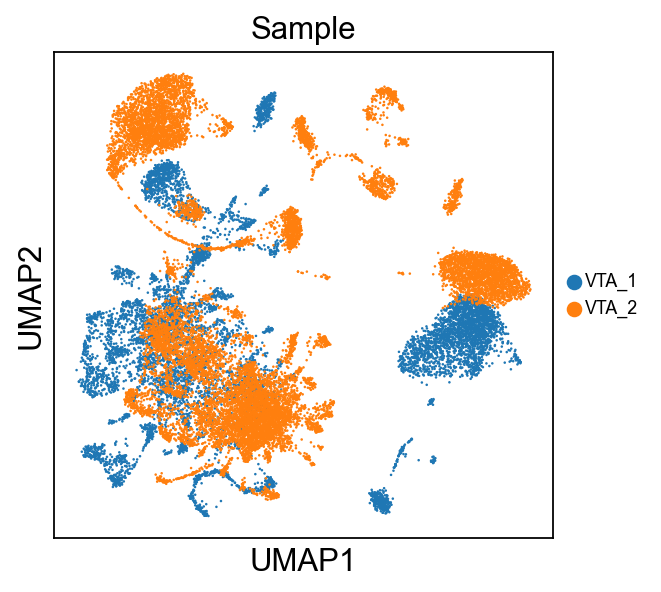

In [22]:
sc.pl.umap(
    adata,
    color="Sample",
    legend_fontsize=8
)

In [6]:
adata

AnnData object with n_obs × n_vars = 23029 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden_res_0.50', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.50', 'Neuron', 'Sample'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2'
    uns: 'Sample_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [23]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat')

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [24]:
sc.set_figure_params(color_map='RdBu_r')
sc.tl.pca(adata, svd_solver='arpack',use_highly_variable=True)

computing PCA
    with n_comps=50


/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:02)


In [9]:
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_pca')
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


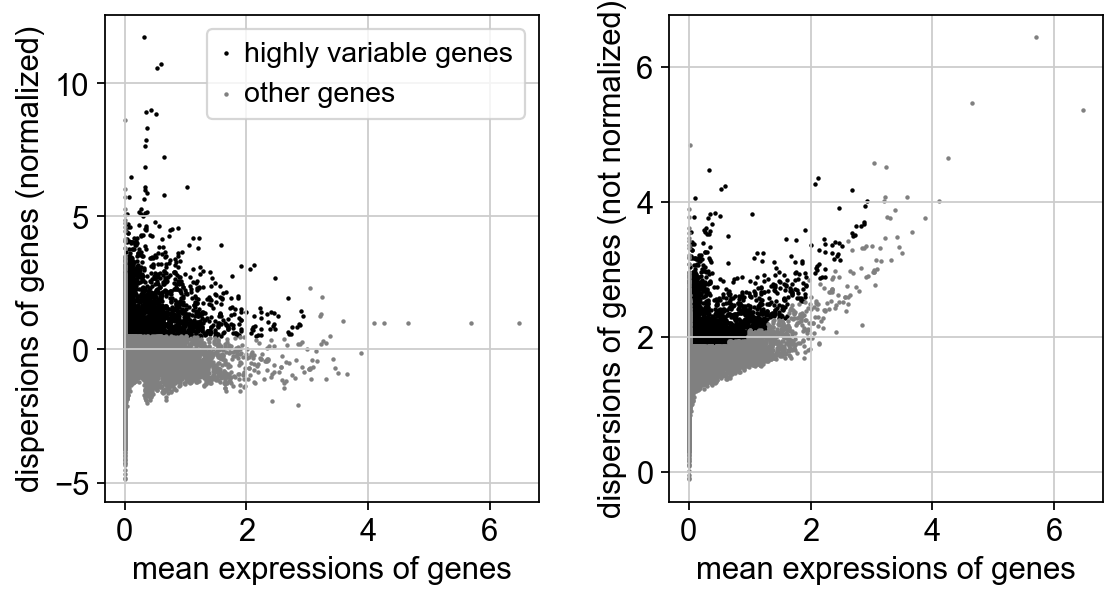

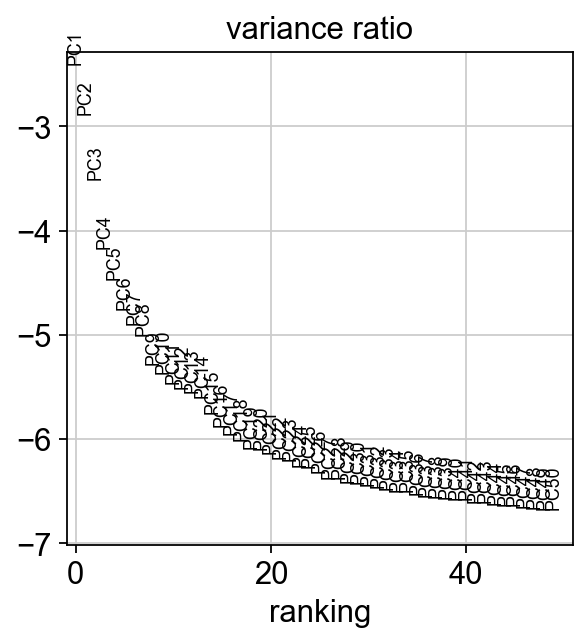

In [25]:
sc.pl.highly_variable_genes(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

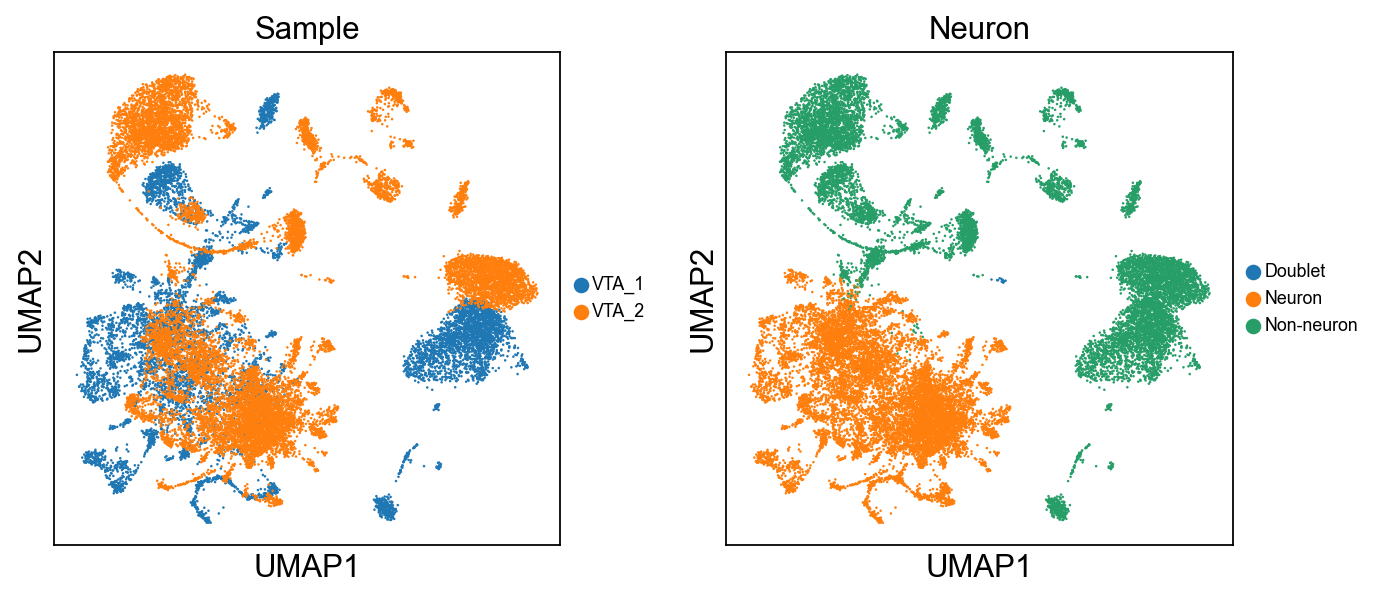

In [26]:
sc.pl.umap(
    adata,
    color=["Sample","Neuron"],
    legend_fontsize=8
)

In [27]:
adata.obs

n_genes  percent_mito  n_counts  doublet_score  \
AAACCCAAGACTGTTC-1-VTA_1     2892           0.0    6381.0       0.093149   
AAACCCACATACCGTA-1-VTA_1     1016           0.0    1703.0       0.046853   
AAACCCAGTAACGCGA-1-VTA_1     4184           0.0   10386.0       0.089820   
AAACCCAGTCACTAGT-1-VTA_1     3622           0.0    8986.0       0.032307   
AAACGAAAGAGCATTA-1-VTA_1     1570           0.0    2479.0       0.013114   
...                           ...           ...       ...            ...   
TTTGTTGGTTCCCACT-1-VTA_2     2275           0.0    4429.0       0.039110   
TTTGTTGGTTTAGACC-1-VTA_2     1140           0.0    1956.0       0.012198   
TTTGTTGTCACGAACT-1-VTA_2     4517           0.0   13127.0       0.111898   
TTTGTTGTCAGAGCAG-1-VTA_2     1271           0.0    2199.0       0.019010   
TTTGTTGTCCTCTTTC-1-VTA_2     1334           0.0    2163.0       0.035227   

                          predicted_doublet leiden_res_0.50 leiden_res_0.80  \
AAACCCAAGACTGTTC-1-VTA_1              False               0               0   
AAACCCACATACCGTA-1-VTA_1              False               1               1   
AAACCCAGTAACGCGA-1-VTA_1              False               2               2   
AAACCCAGTCACTAGT-1-VTA_1              False               3               4   
AAACGAAAGAGCATTA-1-VTA_1              False               5               3   
...                                     ...             ...             ...   
TTTGTTGGTTCCCACT-1-VTA_2              False               3               2   
TTTGTTGGTTTAGACC-1-VTA_2              False               2               1   
TTTGTTGTCACGAACT-1-VTA_2              False               7               9   
TTTGTTGTCAGAGCAG-1-VTA_2              False               5               4   
TTTGTTGTCCTCTTTC-1-VTA_2              False               3              17   

                         leiden_res_1.00 leiden_res_1.20 leiden_res_1.50  \
AAACCCAAGACTGTTC-1-VTA_1               0               0               0   
AAACCCACATACCGTA-1-VTA_1               2               1               2   
AAACCCAGTAACGCGA-1-VTA_1               4               2               5   
AAACCCAGTCACTAGT-1-VTA_1               5               3               6   
AAACGAAAGAGCATTA-1-VTA_1               7               6               7   
...                                  ...             ...             ...   
TTTGTTGGTTCCCACT-1-VTA_2              10               4               5   
TTTGTTGGTTTAGACC-1-VTA_2               1               1               1   
TTTGTTGTCACGAACT-1-VTA_2               4               9              19   
TTTGTTGTCAGAGCAG-1-VTA_2               8              15              18   
TTTGTTGTCCTCTTTC-1-VTA_2              10               4               5   

                              Neuron Sample  
AAACCCAAGACTGTTC-1-VTA_1      Neuron  VTA_1  
AAACCCACATACCGTA-1-VTA_1  Non-neuron  VTA_1  
AAACCCAGTAACGCGA-1-VTA_1      Neuron  VTA_1  
AAACCCAGTCACTAGT-1-VTA_1      Neuron  VTA_1  
AAACGAAAGAGCATTA-1-VTA_1      Neuron  VTA_1  
...                              ...    ...  
TTTGTTGGTTCCCACT-1-VTA_2      Neuron  VTA_2  
TTTGTTGGTTTAGACC-1-VTA_2  Non-neuron  VTA_2  
TTTGTTGTCACGAACT-1-VTA_2      Neuron  VTA_2  
TTTGTTGTCAGAGCAG-1-VTA_2  Non-neuron  VTA_2  
TTTGTTGTCCTCTTTC-1-VTA_2      Neuron  VTA_2  

[23029 rows x 12 columns]

In [28]:
adata = adata[adata.obs['Neuron'].isin (['Neuron','Non-neuron']),:]

In [29]:
adata

View of AnnData object with n_obs × n_vars = 23014 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden_res_0.50', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.50', 'Neuron', 'Sample'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Sample_colors', 'hvg', 'pca', 'Neuron_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

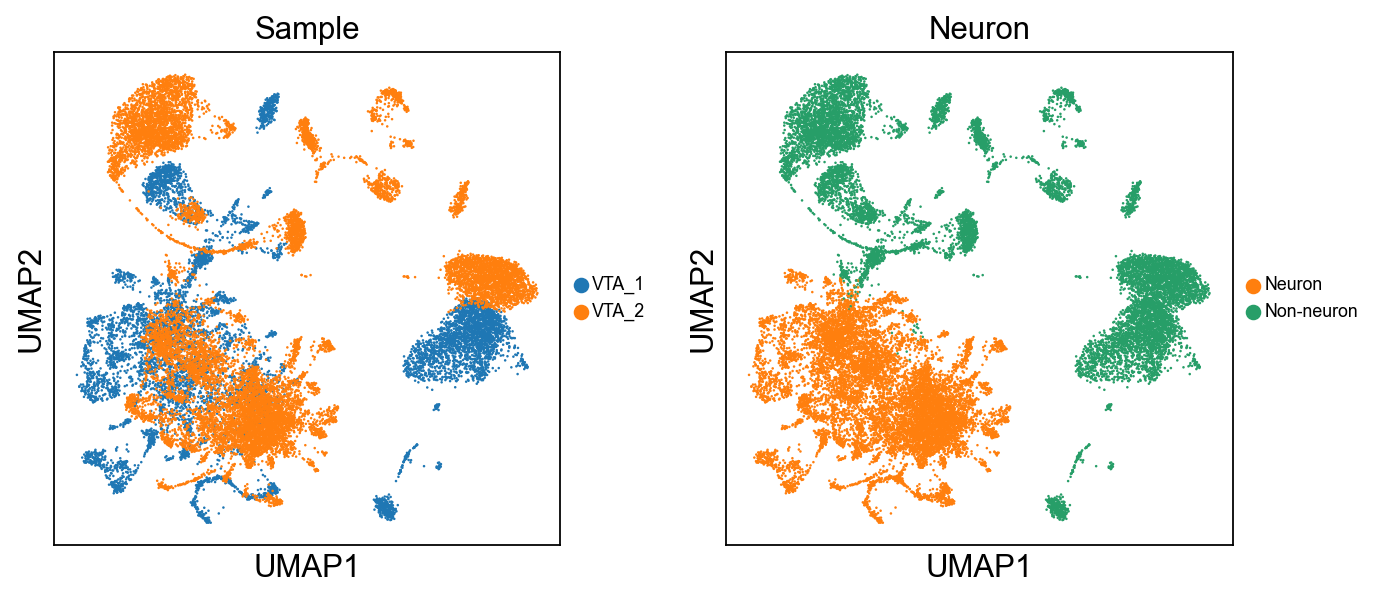

In [30]:
sc.pl.umap(
    adata,
    color=["Sample","Neuron"],
    legend_fontsize=8
)

In [31]:
adata.write('VTA_allcell_merge.h5ad')

In [36]:
sc.external.pp.harmony_integrate(adata, 'Sample', basis='X_pca', adjusted_basis='X_harmony')

2024-05-20 11:36:13,213 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-20 11:36:15,410 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-20 11:36:15,466 - harmonypy - INFO - Iteration 1 of 10
2024-05-20 11:36:18,077 - harmonypy - INFO - Iteration 2 of 10
2024-05-20 11:36:20,673 - harmonypy - INFO - Iteration 3 of 10
2024-05-20 11:36:22,481 - harmonypy - INFO - Converged after 3 iterations
/opt/anaconda3/lib/python3.11/site-packages/scanpy/external/pp/_harmony_integrate.py:97: ImplicitModificationWarning: Setting element `.obsm['X_harmony']` of view, initializing view as actual.
  adata.obsm[adjusted_basis] = harmony_out.Z_corr.T


In [38]:
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [39]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


In [73]:
adata

AnnData object with n_obs × n_vars = 22748 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_1.00', 'leiden_res_1.20', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', '

In [74]:
del adata.uns['Sample_colors']
del adata.uns['Neuron_colors']

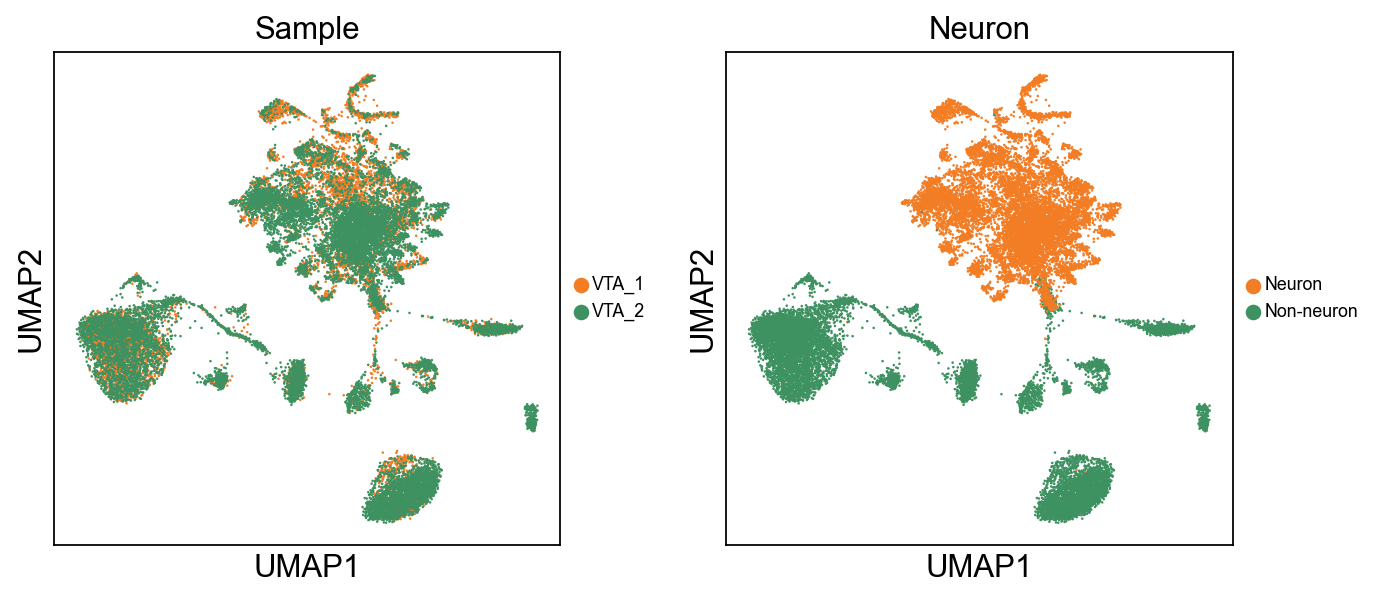

In [78]:
sc.pl.umap(
    adata,
    color=["Sample","Neuron"],palette=['#f27d25','#3e9160'],
    legend_fontsize=8,save='QC_merge.pdf'
)

In [79]:
adata

AnnData object with n_obs × n_vars = 22748 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_1.00', 'leiden_res_1.20', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_merge_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', 'umap', 'Class_new_colors', 'dendro

In [41]:
adata.write('VTA_allcell_merge_harmony.h5ad')

In [38]:
adata = sc.read_h5ad('VTA_allcell_merge_harmony.h5ad')

In [39]:
adata.obs

n_genes  percent_mito  n_counts  doublet_score  \
AAACCCAAGACTGTTC-1-VTA_1     2892           0.0    6381.0       0.093149   
AAACCCACATACCGTA-1-VTA_1     1016           0.0    1703.0       0.046853   
AAACCCAGTAACGCGA-1-VTA_1     4184           0.0   10386.0       0.089820   
AAACCCAGTCACTAGT-1-VTA_1     3622           0.0    8986.0       0.032307   
AAACGAAAGAGCATTA-1-VTA_1     1570           0.0    2479.0       0.013114   
...                           ...           ...       ...            ...   
TTTGTTGGTTCCCACT-1-VTA_2     2275           0.0    4429.0       0.039110   
TTTGTTGGTTTAGACC-1-VTA_2     1140           0.0    1956.0       0.012198   
TTTGTTGTCACGAACT-1-VTA_2     4517           0.0   13127.0       0.111898   
TTTGTTGTCAGAGCAG-1-VTA_2     1271           0.0    2199.0       0.019010   
TTTGTTGTCCTCTTTC-1-VTA_2     1334           0.0    2163.0       0.035227   

                          predicted_doublet      Neuron Sample  \
AAACCCAAGACTGTTC-1-VTA_1              False      Neuron  VTA_1   
AAACCCACATACCGTA-1-VTA_1              False  Non-neuron  VTA_1   
AAACCCAGTAACGCGA-1-VTA_1              False      Neuron  VTA_1   
AAACCCAGTCACTAGT-1-VTA_1              False      Neuron  VTA_1   
AAACGAAAGAGCATTA-1-VTA_1              False      Neuron  VTA_1   
...                                     ...         ...    ...   
TTTGTTGGTTCCCACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGGTTTAGACC-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCACGAACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGTCAGAGCAG-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCCTCTTTC-1-VTA_2              False      Neuron  VTA_2   

                         leiden_res_0.50 leiden_res_0.80 leiden_res_1.00  \
AAACCCAAGACTGTTC-1-VTA_1               0               0               0   
AAACCCACATACCGTA-1-VTA_1               2               1               1   
AAACCCAGTAACGCGA-1-VTA_1               3               3               3   
AAACCCAGTCACTAGT-1-VTA_1               1               4               4   
AAACGAAAGAGCATTA-1-VTA_1               4               5               6   
...                                  ...             ...             ...   
TTTGTTGGTTCCCACT-1-VTA_2               1               4               4   
TTTGTTGGTTTAGACC-1-VTA_2               6               6               7   
TTTGTTGTCACGAACT-1-VTA_2               7               8               5   
TTTGTTGTCAGAGCAG-1-VTA_2               2               2               2   
TTTGTTGTCCTCTTTC-1-VTA_2              11              12              12   

                         leiden_res_1.20 leiden_res_1.50 Neuron_merge  
AAACCCAAGACTGTTC-1-VTA_1               0               0       Neuron  
AAACCCACATACCGTA-1-VTA_1               2               2   Non-neuron  
AAACCCAGTAACGCGA-1-VTA_1               4               4       Neuron  
AAACCCAGTCACTAGT-1-VTA_1               5               5       Neuron  
AAACGAAAGAGCATTA-1-VTA_1              10              11       Neuron  
...                                  ...             ...          ...  
TTTGTTGGTTCCCACT-1-VTA_2               5               9       Neuron  
TTTGTTGGTTTAGACC-1-VTA_2              11              12   Non-neuron  
TTTGTTGTCACGAACT-1-VTA_2               6              14       Neuron  
TTTGTTGTCAGAGCAG-1-VTA_2               3               3   Non-neuron  
TTTGTTGTCCTCTTTC-1-VTA_2              16              10       Neuron  

[23014 rows x 13 columns]

In [44]:
del adata.obs['leiden_res_0.50']
del adata.obs['leiden_res_0.80']
del adata.obs['leiden_res_1.00']
del adata.obs['leiden_res_1.20']
del adata.obs['leiden_res_1.50']

In [46]:
for res in [0.5,0.8,1.0,1.2,1.5]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

running Leiden clustering
    finished: found 24 clusters and added
    'leiden_res_0.50', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 32 clusters and added
    'leiden_res_0.80', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 35 clusters and added
    'leiden_res_1.00', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 37 clusters and added
    'leiden_res_1.20', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 41 clusters and added
    'leiden_res_1.50', the cluster labels (adata.obs, categorical) (0:00:00)


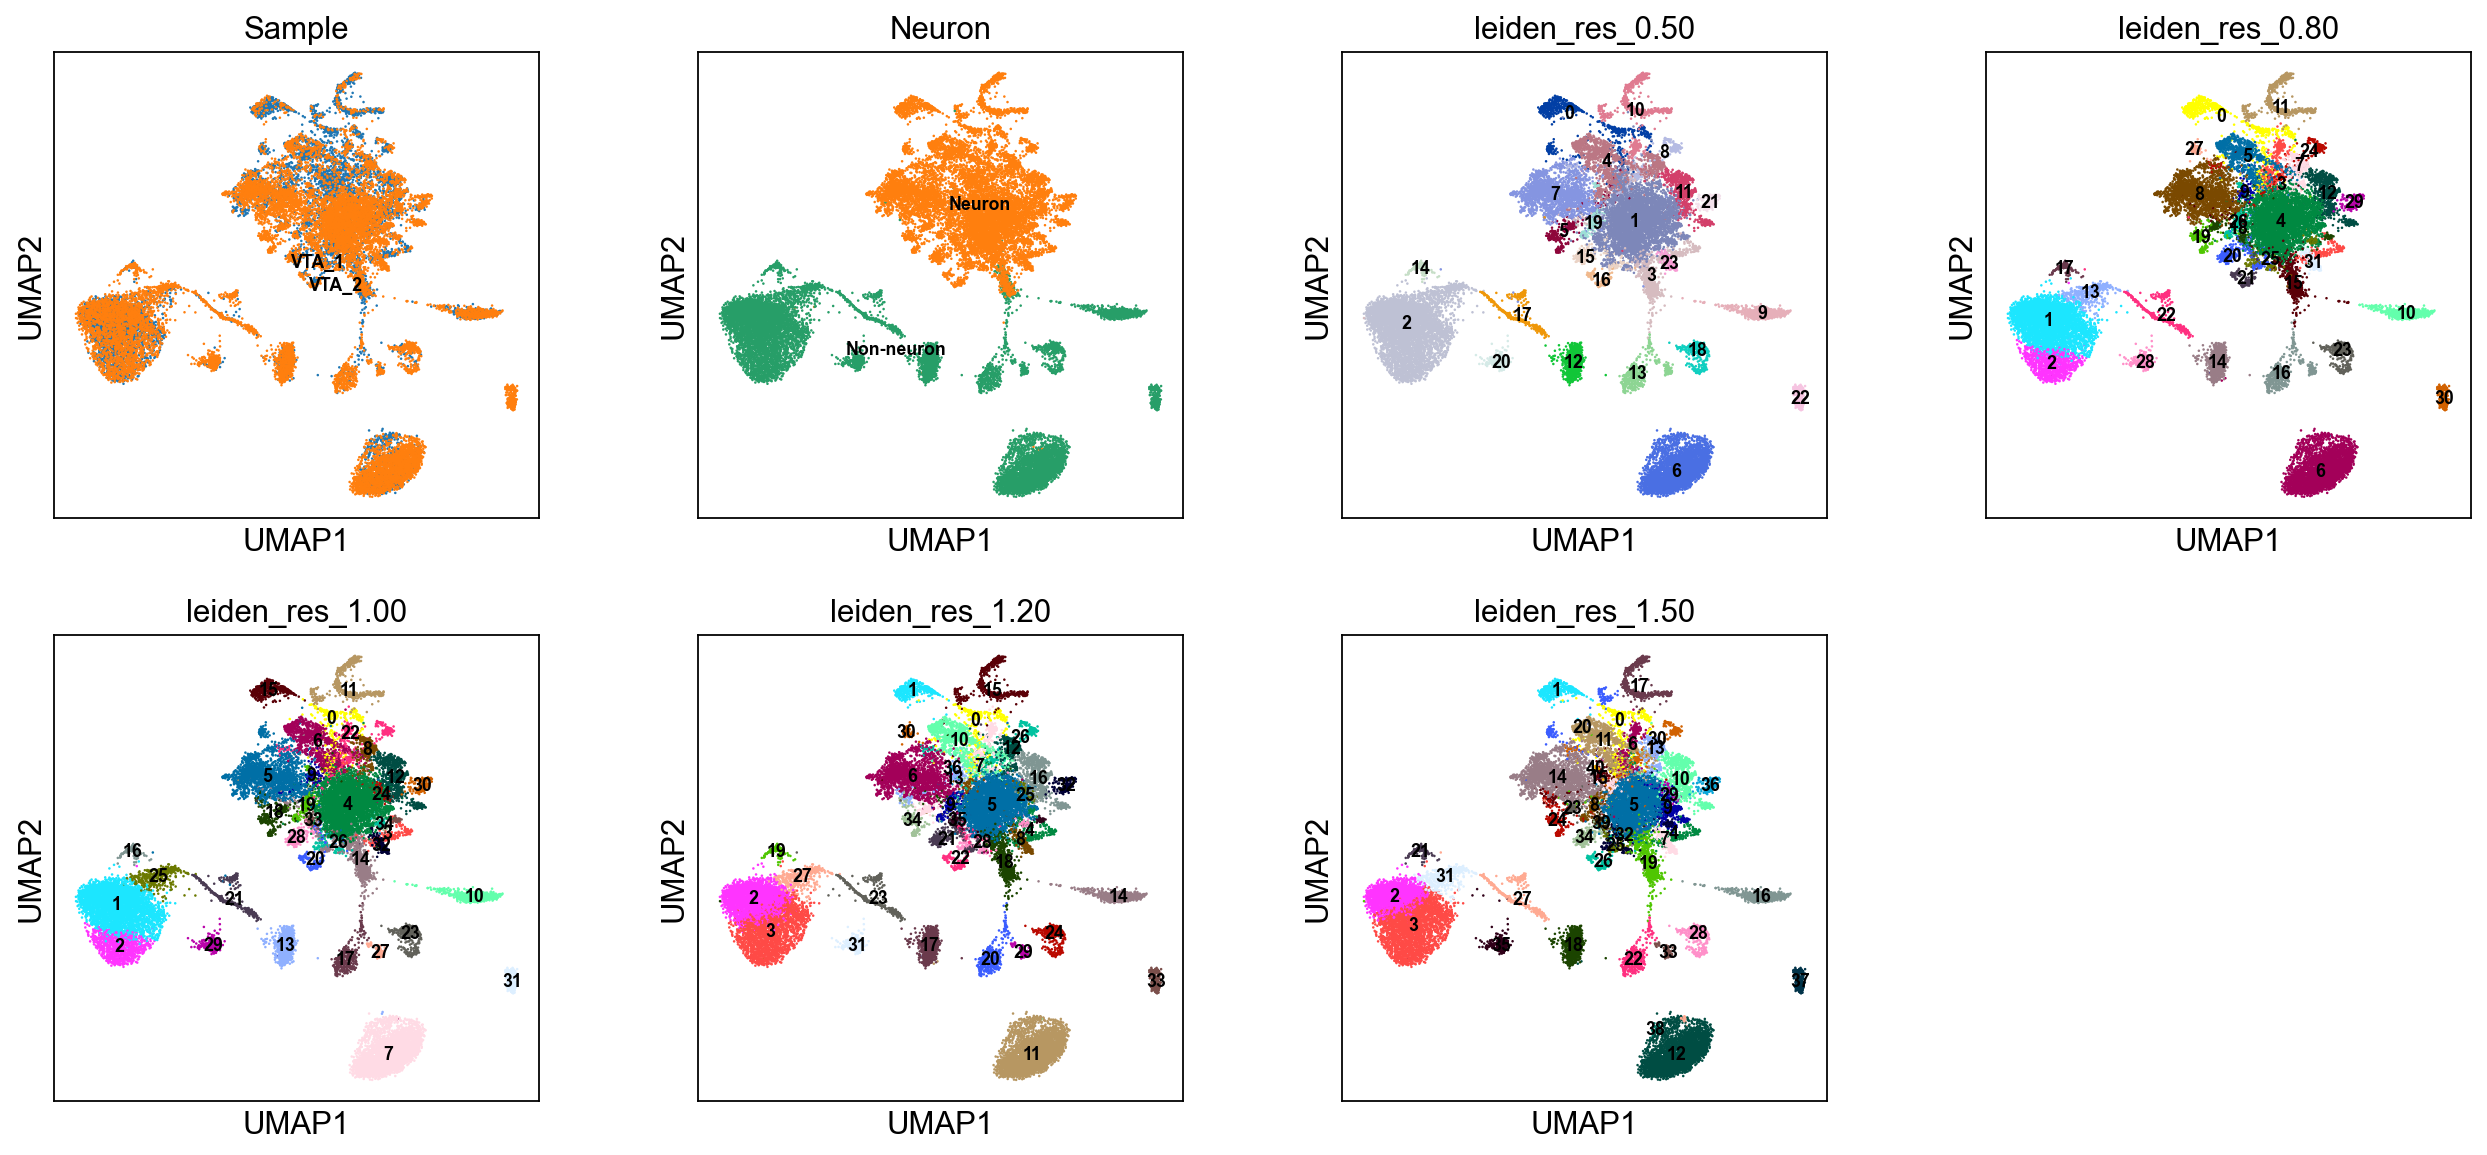

In [47]:
sc.pl.umap(
    adata,
    color=["Sample","Neuron","leiden_res_0.50", "leiden_res_0.80","leiden_res_1.00","leiden_res_1.20","leiden_res_1.50"],
    legend_loc="on data",legend_fontsize=8
)

In [48]:
marker_gene = ['Slc17a6','Slc17a7','Slc17a8','Snap25','Slc32a1','Slc18a2','Gad1','Gad2','Aldh1a1','Th','Ddc']

In [49]:
for res in [0.5,0.8,1.0,1.2,1.5]:
    sc.tl.dendrogram(adata, groupby=f"leiden_res_{res:4.2f}")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_0.50']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_0.80']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_1.00']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_1.20']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_1.50']`


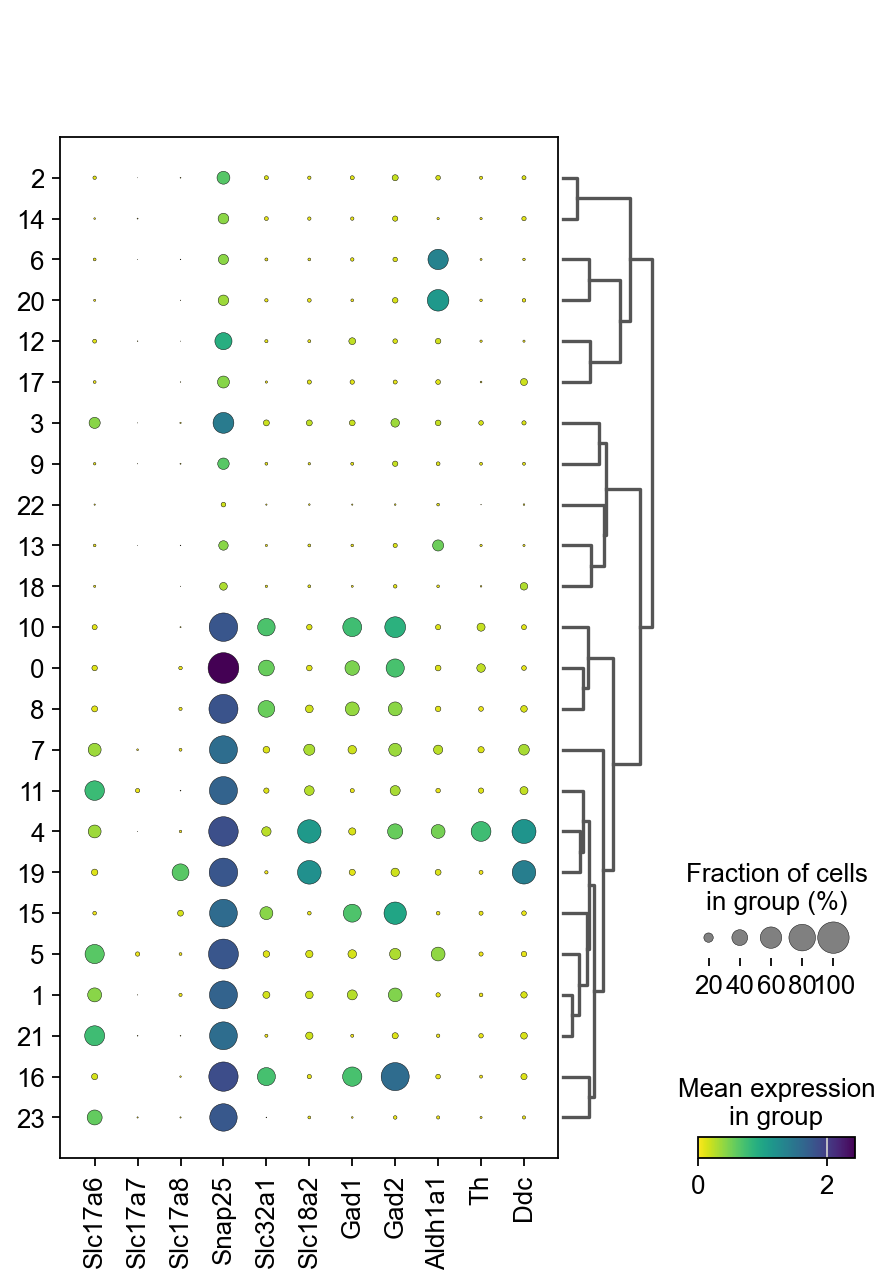

In [59]:
sc.pl.dotplot(adata, marker_gene,groupby=["leiden_res_0.50"],cmap='viridis_r',dendrogram=True)

In [52]:
Neuron = []
for i in range(adata.shape[0]):
    if (int(adata.obs['leiden_res_0.50'][i]) in (3,10,0,8,7,11,4,19,15,5,1,21,16,23)): 
        Neuron.append('Neuron')
    else: 
        Neuron.append('Non-neuron')
adata.obs['Neuron_merge'] = Neuron

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_80056/1743523894.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (int(adata.obs['leiden_res_0.50'][i]) in (3,10,0,8,7,11,4,19,15,5,1,21,16,23)):


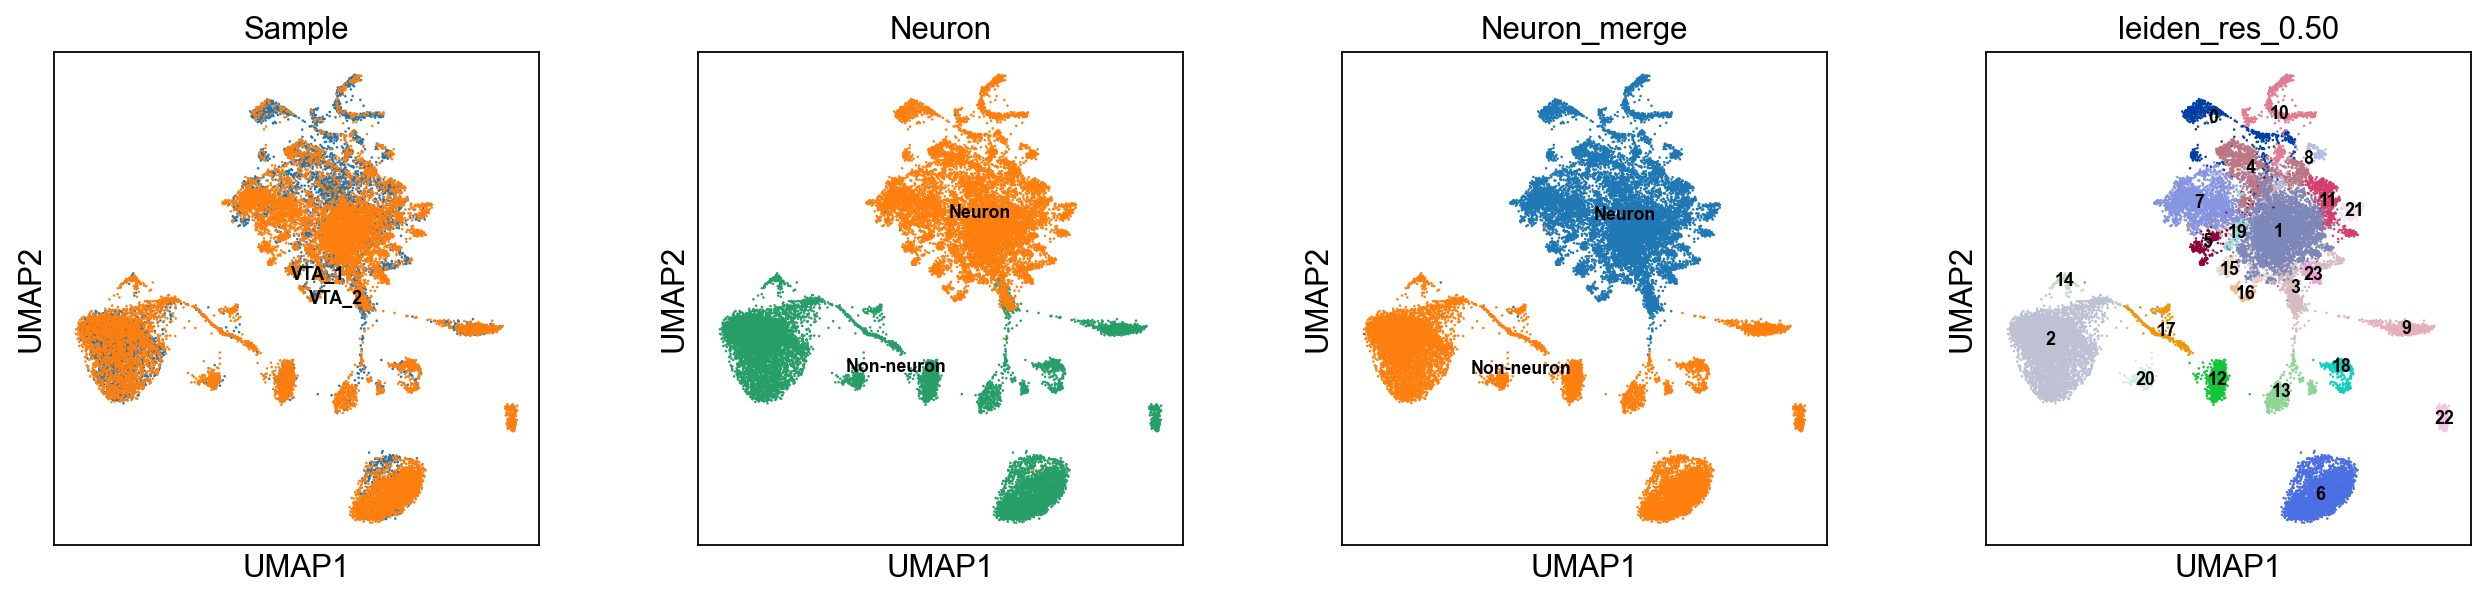

In [53]:
sc.pl.umap(
    adata,
    color=["Sample","Neuron","Neuron_merge","leiden_res_0.50"],
    legend_loc="on data",legend_fontsize=8
)

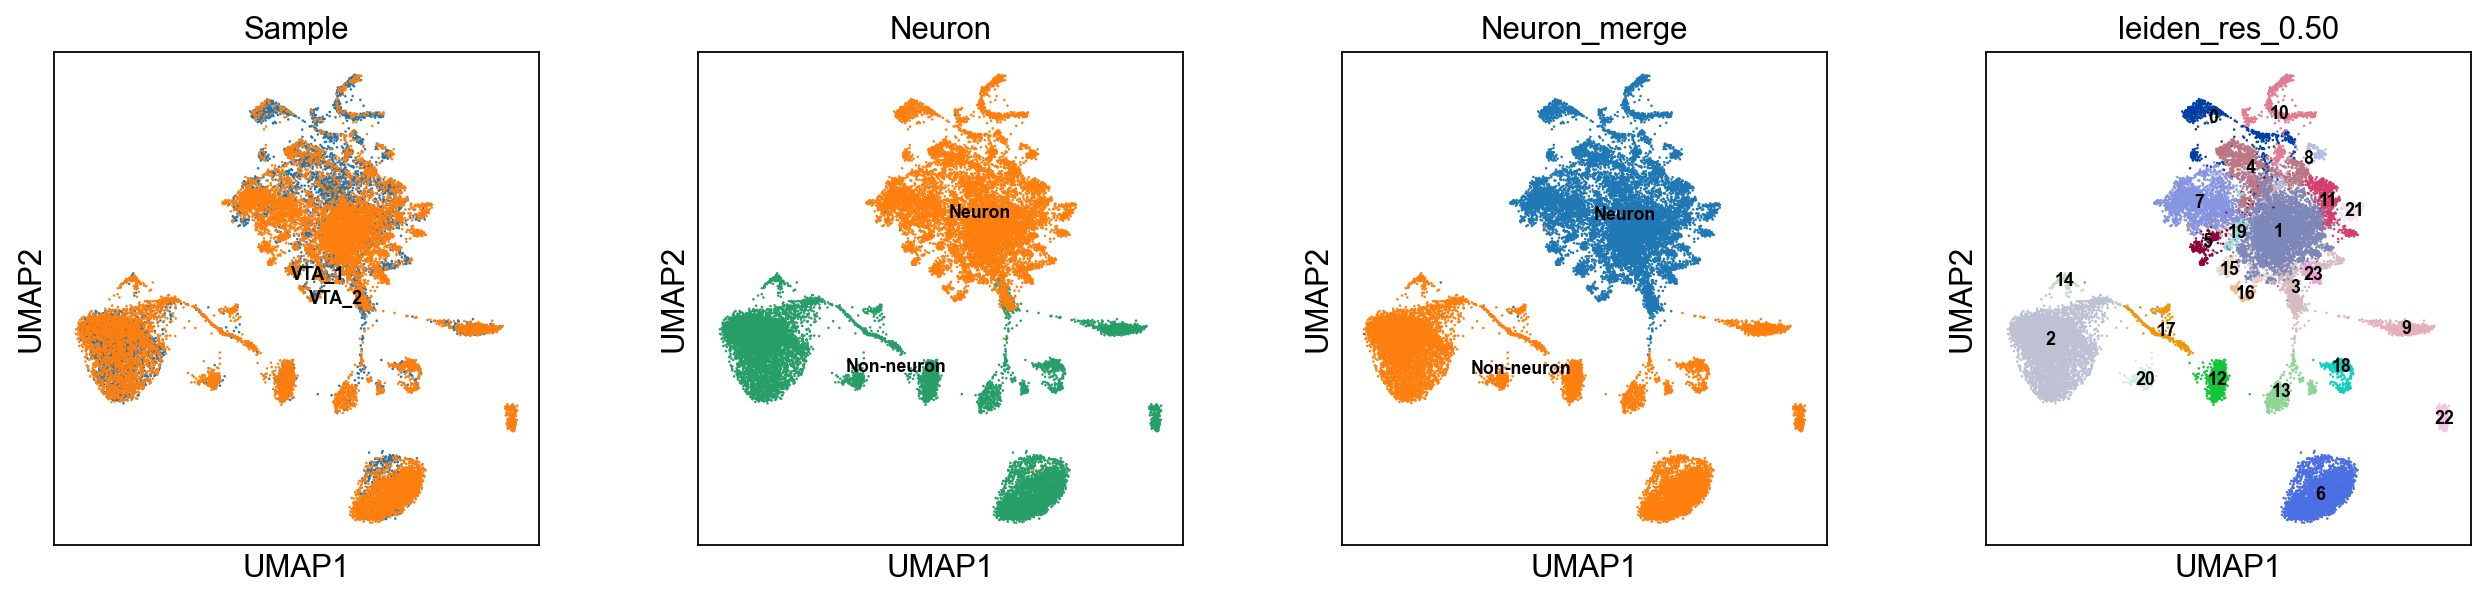

In [41]:
sc.pl.umap(
    adata,
    color=["Sample","Neuron","Neuron_merge","leiden_res_0.50"],
    legend_loc="on data",legend_fontsize=8,save = 'allcell_merge_neuron.pdf'
)

In [55]:
adata.write('VTA_allcell_merge_harmony.h5ad')

In [2]:
adata = sc.read_h5ad('VTA_allcell_merge_harmony.h5ad')

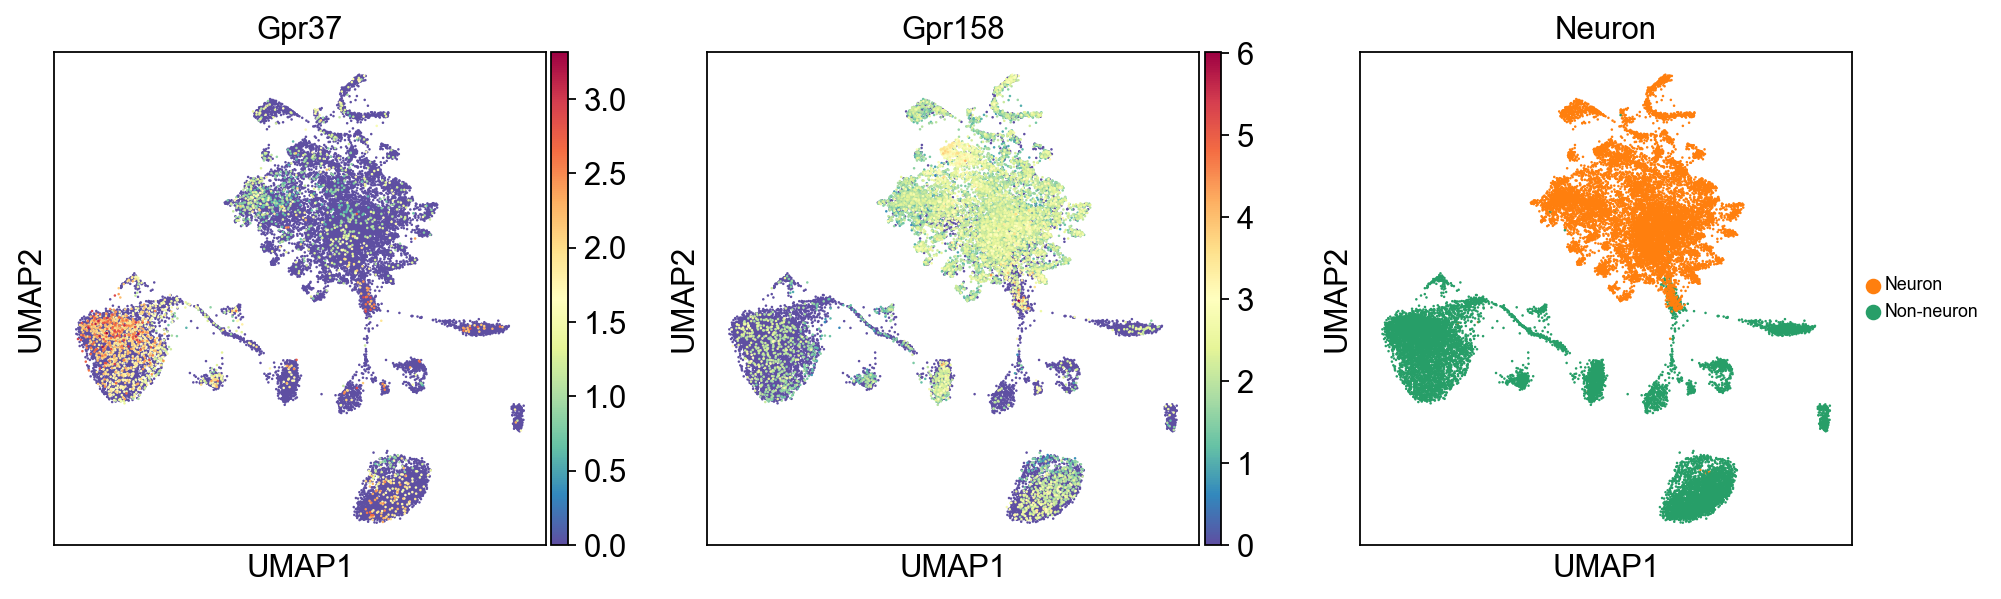

In [56]:
sc.pl.umap(
    adata,
    color=["Gpr37","Gpr158","Neuron"],
    legend_fontsize=8,cmap='Spectral_r'
)

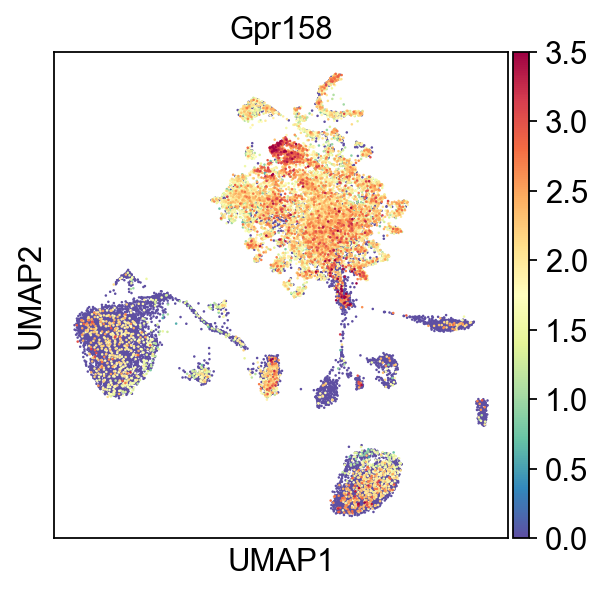

In [58]:
sc.pl.umap(
    adata,
    color="Gpr158",
    legend_fontsize=8,cmap='Spectral_r',vmax = 3.5
)

In [2]:
adata=sc.read_h5ad('VTA_allcell_merge_harmony.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 23014 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_0.50', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.50', 'Neuron_merge'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'le

In [3]:
adata

AnnData object with n_obs × n_vars = 23014 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_1.00', 'leiden_res_1.20', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', '

In [4]:
adata.obs

n_genes  percent_mito  n_counts  doublet_score  \
AAACCCAAGACTGTTC-1-VTA_1     2892           0.0    6381.0       0.093149   
AAACCCACATACCGTA-1-VTA_1     1016           0.0    1703.0       0.046853   
AAACCCAGTAACGCGA-1-VTA_1     4184           0.0   10386.0       0.089820   
AAACCCAGTCACTAGT-1-VTA_1     3622           0.0    8986.0       0.032307   
AAACGAAAGAGCATTA-1-VTA_1     1570           0.0    2479.0       0.013114   
...                           ...           ...       ...            ...   
TTTGTTGGTTCCCACT-1-VTA_2     2275           0.0    4429.0       0.039110   
TTTGTTGGTTTAGACC-1-VTA_2     1140           0.0    1956.0       0.012198   
TTTGTTGTCACGAACT-1-VTA_2     4517           0.0   13127.0       0.111898   
TTTGTTGTCAGAGCAG-1-VTA_2     1271           0.0    2199.0       0.019010   
TTTGTTGTCCTCTTTC-1-VTA_2     1334           0.0    2163.0       0.035227   

                          predicted_doublet      Neuron Sample  \
AAACCCAAGACTGTTC-1-VTA_1              False      Neuron  VTA_1   
AAACCCACATACCGTA-1-VTA_1              False  Non-neuron  VTA_1   
AAACCCAGTAACGCGA-1-VTA_1              False      Neuron  VTA_1   
AAACCCAGTCACTAGT-1-VTA_1              False      Neuron  VTA_1   
AAACGAAAGAGCATTA-1-VTA_1              False      Neuron  VTA_1   
...                                     ...         ...    ...   
TTTGTTGGTTCCCACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGGTTTAGACC-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCACGAACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGTCAGAGCAG-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCCTCTTTC-1-VTA_2              False      Neuron  VTA_2   

                         leiden_res_1.00 leiden_res_1.20 Neuron_merge  \
AAACCCAAGACTGTTC-1-VTA_1               0               0       Neuron   
AAACCCACATACCGTA-1-VTA_1               1               2   Non-neuron   
AAACCCAGTAACGCGA-1-VTA_1               3               4       Neuron   
AAACCCAGTCACTAGT-1-VTA_1               4               5       Neuron   
AAACGAAAGAGCATTA-1-VTA_1               6              10       Neuron   
...                                  ...             ...          ...   
TTTGTTGGTTCCCACT-1-VTA_2               4               5       Neuron   
TTTGTTGGTTTAGACC-1-VTA_2               7              11   Non-neuron   
TTTGTTGTCACGAACT-1-VTA_2               5               6       Neuron   
TTTGTTGTCAGAGCAG-1-VTA_2               2               3   Non-neuron   
TTTGTTGTCCTCTTTC-1-VTA_2              12              16       Neuron   

                           Class_new  
AAACCCAAGACTGTTC-1-VTA_1   GABA-Glut  
AAACCCACATACCGTA-1-VTA_1  Non-neuron  
AAACCCAGTAACGCGA-1-VTA_1        Glut  
AAACCCAGTCACTAGT-1-VTA_1   GABA-Glut  
AAACGAAAGAGCATTA-1-VTA_1        Dopa  
...                              ...  
TTTGTTGGTTCCCACT-1-VTA_2        Glut  
TTTGTTGGTTTAGACC-1-VTA_2  Non-neuron  
TTTGTTGTCACGAACT-1-VTA_2   GABA-Glut  
TTTGTTGTCAGAGCAG-1-VTA_2  Non-neuron  
TTTGTTGTCCTCTTTC-1-VTA_2        Glut  

[23014 rows x 11 columns]

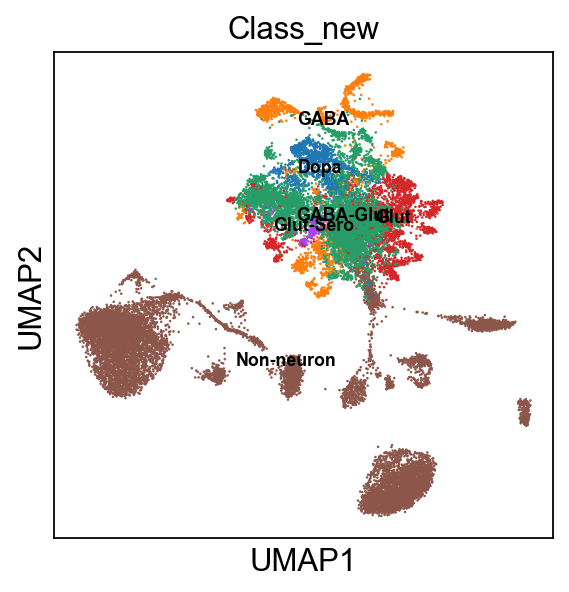

In [5]:
sc.pl.umap(
    adata,
    color="Class_new",
    legend_fontsize=8,legend_loc="on data"
)

In [5]:
del adata.obs['leiden_res_0.50']
del adata.obs['leiden_res_0.80']
del adata.obs['leiden_res_1.00']
del adata.obs['leiden_res_1.20']
del adata.obs['leiden_res_1.50']

In [11]:
neuron_merge = adata[adata.obs['Neuron_merge'] == 'Neuron',:]

In [15]:
neuron_merge

View of AnnData object with n_obs × n_vars = 11906 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'Neuron_merge'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_um

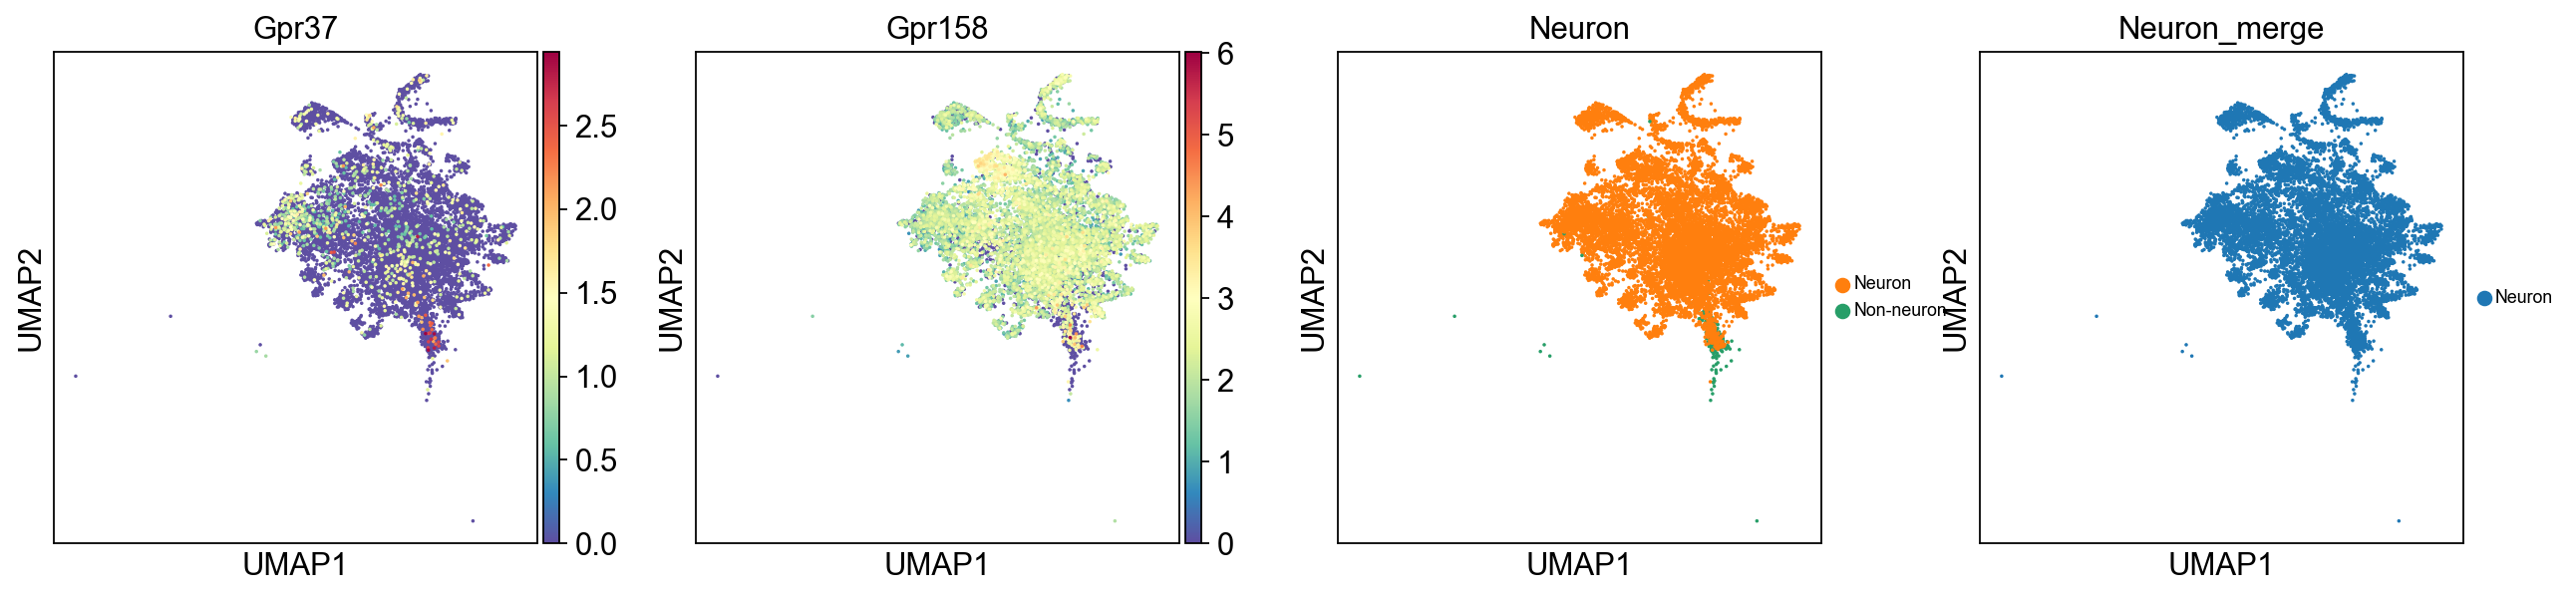

In [12]:
sc.pl.umap(
    neuron_merge,
    color=["Gpr37","Gpr158","Neuron","Neuron_merge"],
    legend_fontsize=8,cmap='Spectral_r'
)

In [17]:
neuron_merge.write('VTA_Neuron.h5ad')

In [13]:
neuron = adata[adata.obs['Neuron'] == 'Neuron',:]

In [16]:
neuron

View of AnnData object with n_obs × n_vars = 11604 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'Neuron_merge'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_um

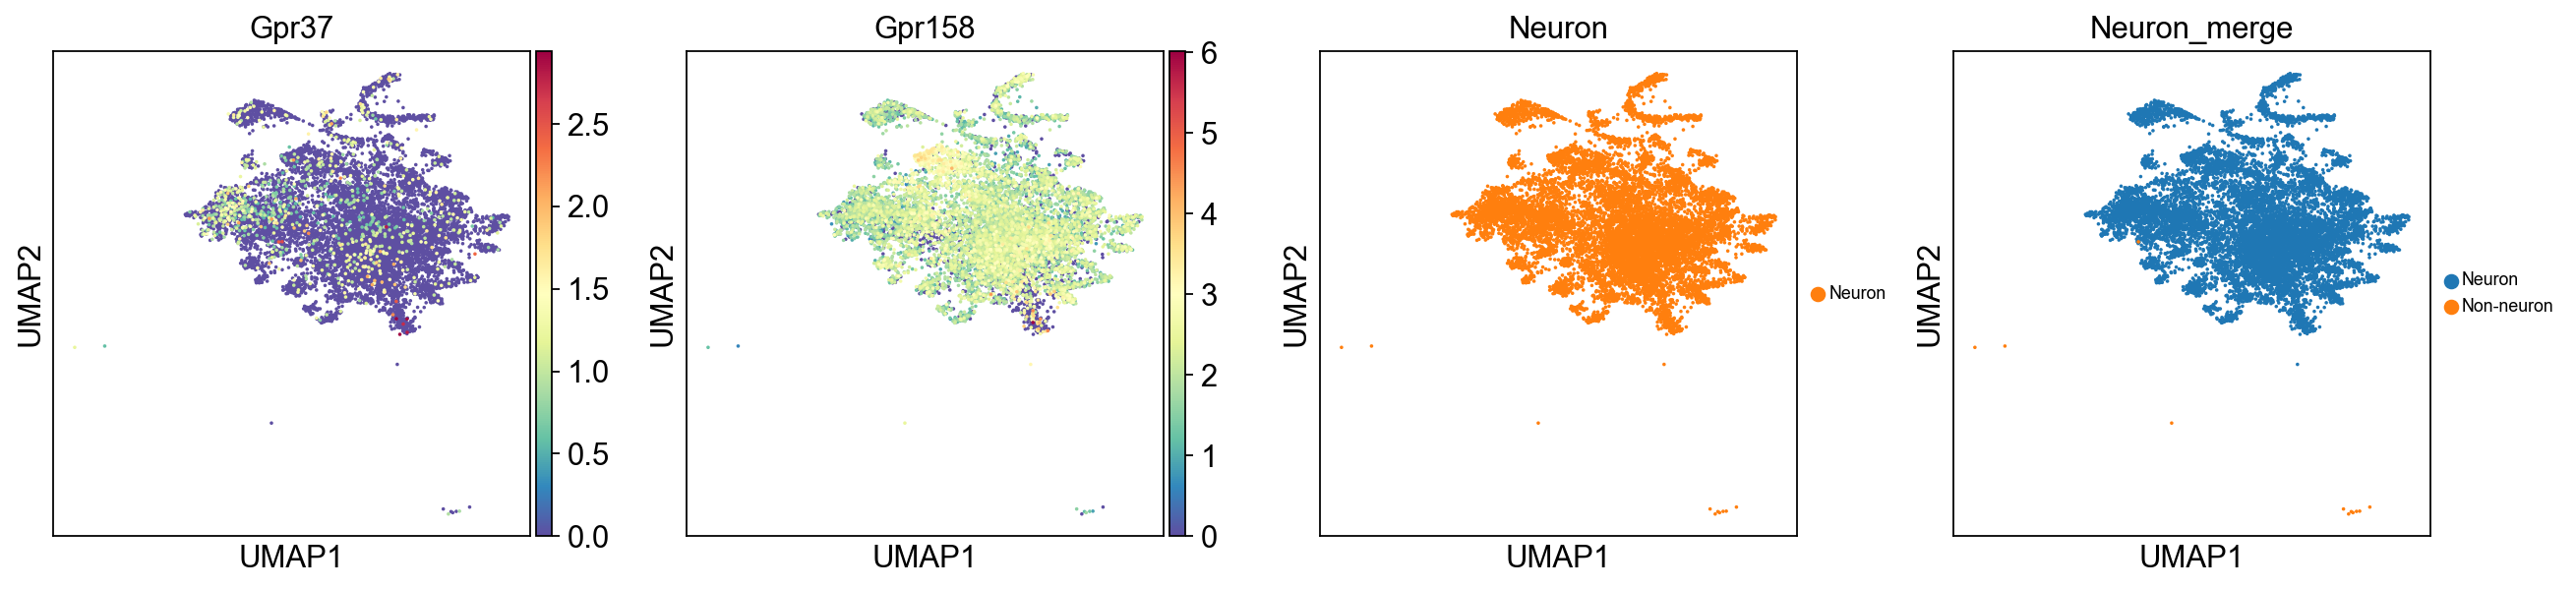

In [14]:
sc.pl.umap(
    neuron,
    color=["Gpr37","Gpr158","Neuron","Neuron_merge"],
    legend_fontsize=8,cmap='Spectral_r'
)

In [18]:
from collections import Counter

In [19]:
neuron_count = Counter(list(adata.obs.Neuron_merge))

In [20]:
neuron_count

Counter({'Neuron': 11906, 'Non-neuron': 11108})

In [22]:
neuron

View of AnnData object with n_obs × n_vars = 11604 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'Neuron_merge'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_um

In [24]:
adata.obs['Neuron']

AAACCCAAGACTGTTC-1-VTA_1        Neuron
AAACCCACATACCGTA-1-VTA_1    Non-neuron
AAACCCAGTAACGCGA-1-VTA_1        Neuron
AAACCCAGTCACTAGT-1-VTA_1        Neuron
AAACGAAAGAGCATTA-1-VTA_1        Neuron
                               ...    
TTTGTTGGTTCCCACT-1-VTA_2        Neuron
TTTGTTGGTTTAGACC-1-VTA_2    Non-neuron
TTTGTTGTCACGAACT-1-VTA_2        Neuron
TTTGTTGTCAGAGCAG-1-VTA_2    Non-neuron
TTTGTTGTCCTCTTTC-1-VTA_2        Neuron
Name: Neuron, Length: 23014, dtype: category
Categories (2, object): ['Neuron', 'Non-neuron']

In [25]:
non_neuron = adata[adata.obs['Neuron'] == 'Non-neuron',:]

In [27]:
non_neuron.obs

n_genes  percent_mito  n_counts  doublet_score  \
AAACCCACATACCGTA-1-VTA_1     1016           0.0    1703.0       0.046853   
AAACGAAAGGTAAGGA-1-VTA_1      902           0.0    1472.0       0.009311   
AAACGAACAACGGGTA-1-VTA_1      922           0.0    1269.0       0.003303   
AAACGAACAGTTAGGG-1-VTA_1      879           0.0    1509.0       0.057174   
AAACGAATCCCGTAAA-1-VTA_1     1069           0.0    1714.0       0.048170   
...                           ...           ...       ...            ...   
TTTGTTGCATCGTCCT-1-VTA_2      821           0.0    1154.0       0.003590   
TTTGTTGGTCCTTGTC-1-VTA_2      777           0.0    1112.0       0.013088   
TTTGTTGGTCTTGAGT-1-VTA_2      829           0.0    1210.0       0.021540   
TTTGTTGGTTTAGACC-1-VTA_2     1140           0.0    1956.0       0.012198   
TTTGTTGTCAGAGCAG-1-VTA_2     1271           0.0    2199.0       0.019010   

                          predicted_doublet      Neuron Sample Neuron_merge  
AAACCCACATACCGTA-1-VTA_1              False  Non-neuron  VTA_1   Non-neuron  
AAACGAAAGGTAAGGA-1-VTA_1              False  Non-neuron  VTA_1   Non-neuron  
AAACGAACAACGGGTA-1-VTA_1              False  Non-neuron  VTA_1   Non-neuron  
AAACGAACAGTTAGGG-1-VTA_1              False  Non-neuron  VTA_1   Non-neuron  
AAACGAATCCCGTAAA-1-VTA_1              False  Non-neuron  VTA_1   Non-neuron  
...                                     ...         ...    ...          ...  
TTTGTTGCATCGTCCT-1-VTA_2              False  Non-neuron  VTA_2   Non-neuron  
TTTGTTGGTCCTTGTC-1-VTA_2              False  Non-neuron  VTA_2   Non-neuron  
TTTGTTGGTCTTGAGT-1-VTA_2              False  Non-neuron  VTA_2   Non-neuron  
TTTGTTGGTTTAGACC-1-VTA_2              False  Non-neuron  VTA_2   Non-neuron  
TTTGTTGTCAGAGCAG-1-VTA_2              False  Non-neuron  VTA_2   Non-neuron  

[11410 rows x 8 columns]

In [28]:
non_neuron.write('VTA_Non_neuron.h5ad')

In [29]:
marker_non=['Enpp6','Sox10', 'Mog','Cx3cr1','Aldh1l1', 'Gja1','Sox10', 'Pdgfra','Slc47a1', 'Slc6a13']

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    with n_comps=50


/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}
/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:00)


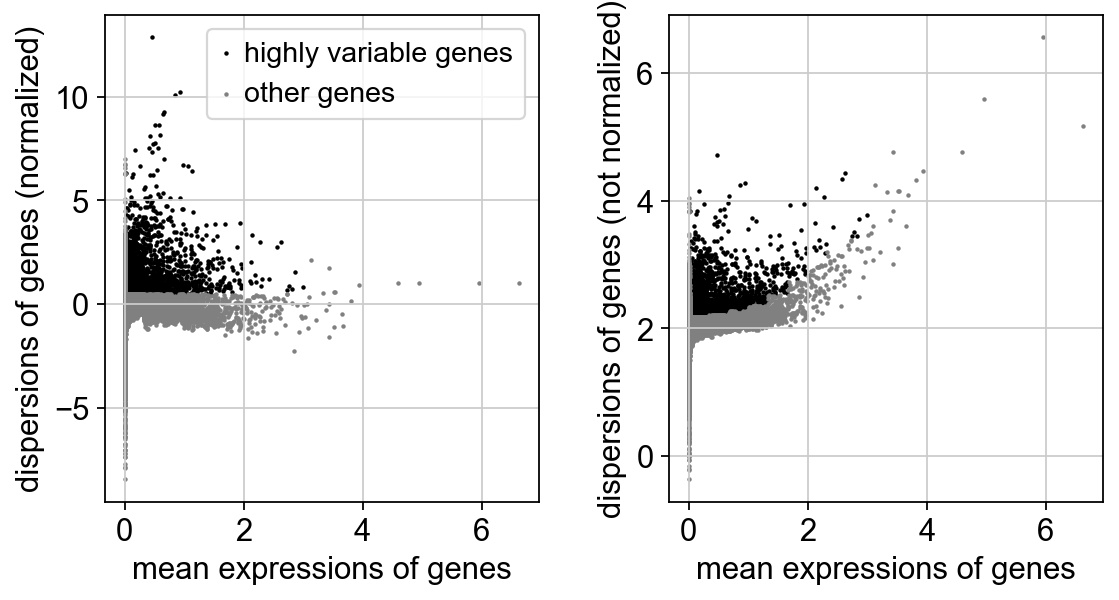

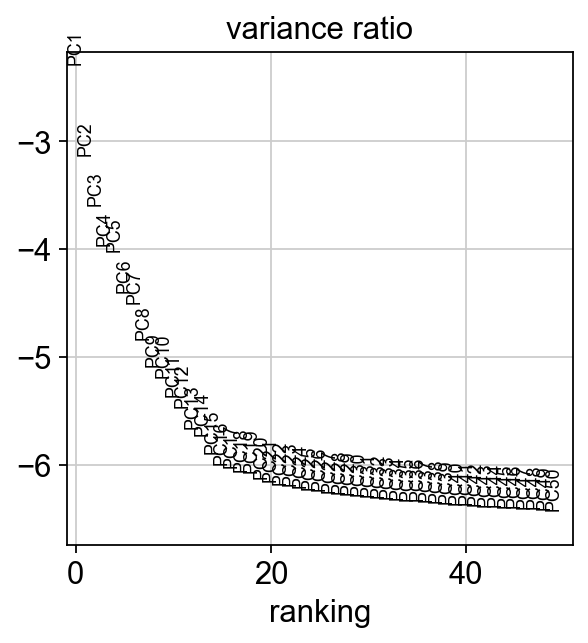

2024-05-27 11:27:14,467 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-27 11:27:15,557 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-27 11:27:15,584 - harmonypy - INFO - Iteration 1 of 10
2024-05-27 11:27:16,710 - harmonypy - INFO - Iteration 2 of 10
2024-05-27 11:27:17,746 - harmonypy - INFO - Iteration 3 of 10
2024-05-27 11:27:18,478 - harmonypy - INFO - Converged after 3 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [30]:
sc.pp.highly_variable_genes(non_neuron, min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat')
sc.set_figure_params(color_map='RdBu_r')
sc.tl.pca(non_neuron, svd_solver='arpack',use_highly_variable=True)
sc.pl.highly_variable_genes(non_neuron)
sc.pl.pca_variance_ratio(non_neuron, n_pcs=50, log=True)
sc.external.pp.harmony_integrate(non_neuron, 'Sample', basis='X_pca', adjusted_basis='X_harmony')
sc.pp.neighbors(non_neuron, n_neighbors=20, use_rep='X_harmony')
sc.tl.umap(non_neuron)

In [31]:
for res in [0.5,0.8,1.0,1.2,1.5]:
    sc.tl.leiden(
        non_neuron, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

running Leiden clustering
    finished: found 13 clusters and added
    'leiden_res_0.50', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_res_0.80', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden_res_1.00', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden_res_1.20', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden_res_1.50', the cluster labels (adata.obs, categorical) (0:00:00)


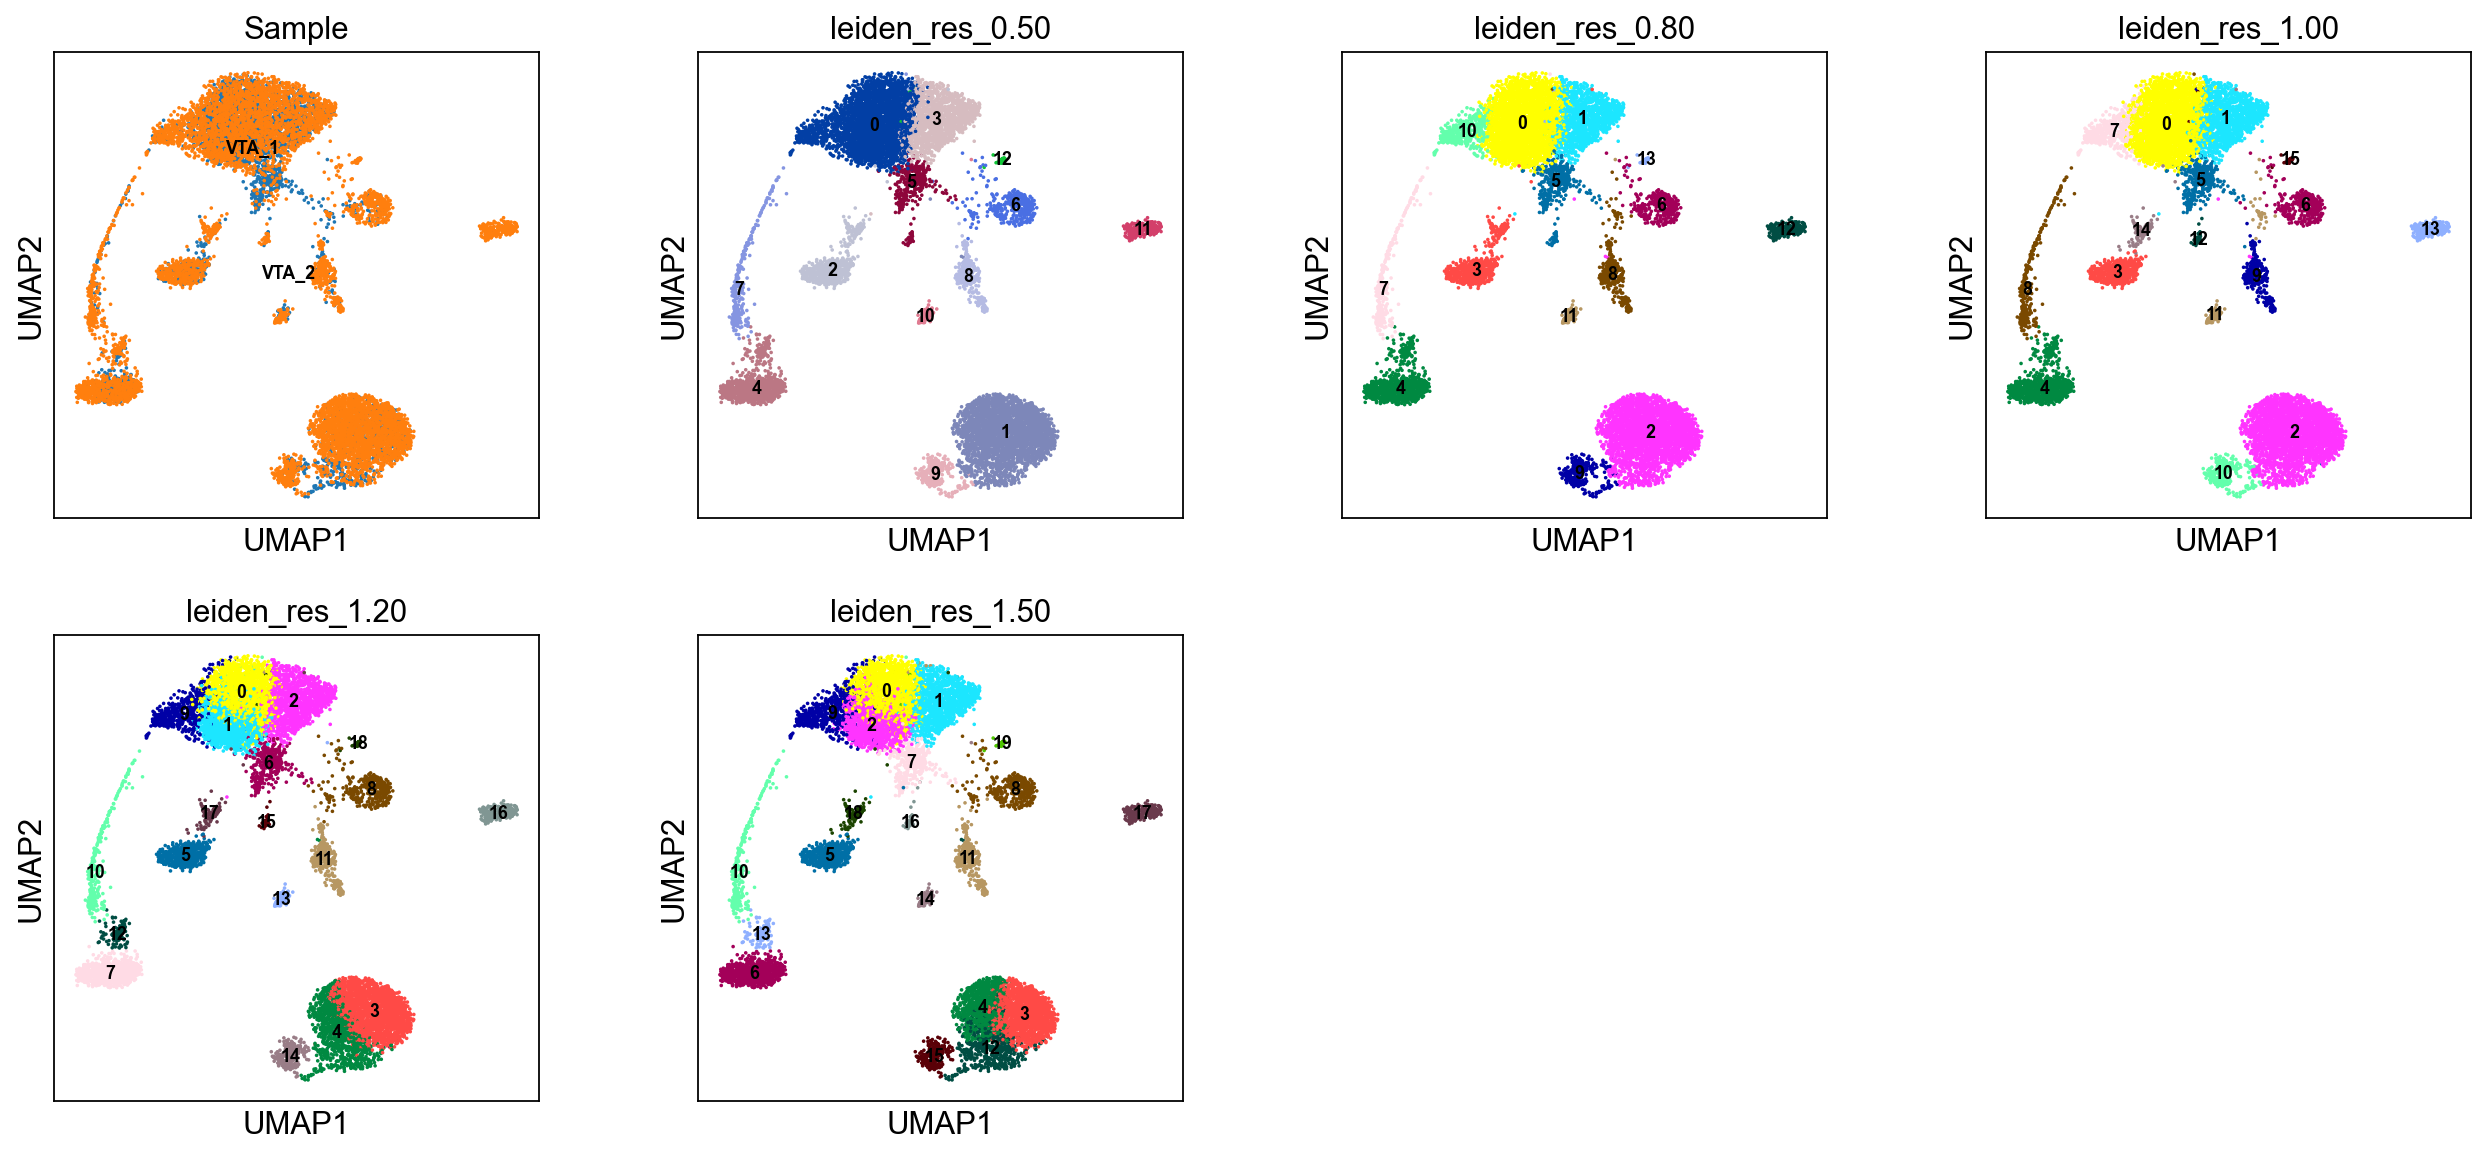

In [33]:
sc.pl.umap(
    non_neuron,
    color=["Sample","leiden_res_0.50", "leiden_res_0.80","leiden_res_1.00","leiden_res_1.20","leiden_res_1.50"],
    legend_loc="on data",legend_fontsize=8
)

In [34]:
for res in [0.5,0.8,1.0,1.2,1.5]:
    sc.tl.dendrogram(non_neuron, groupby=f"leiden_res_{res:4.2f}")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_0.50']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_0.80']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_1.00']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_1.20']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_1.50']`


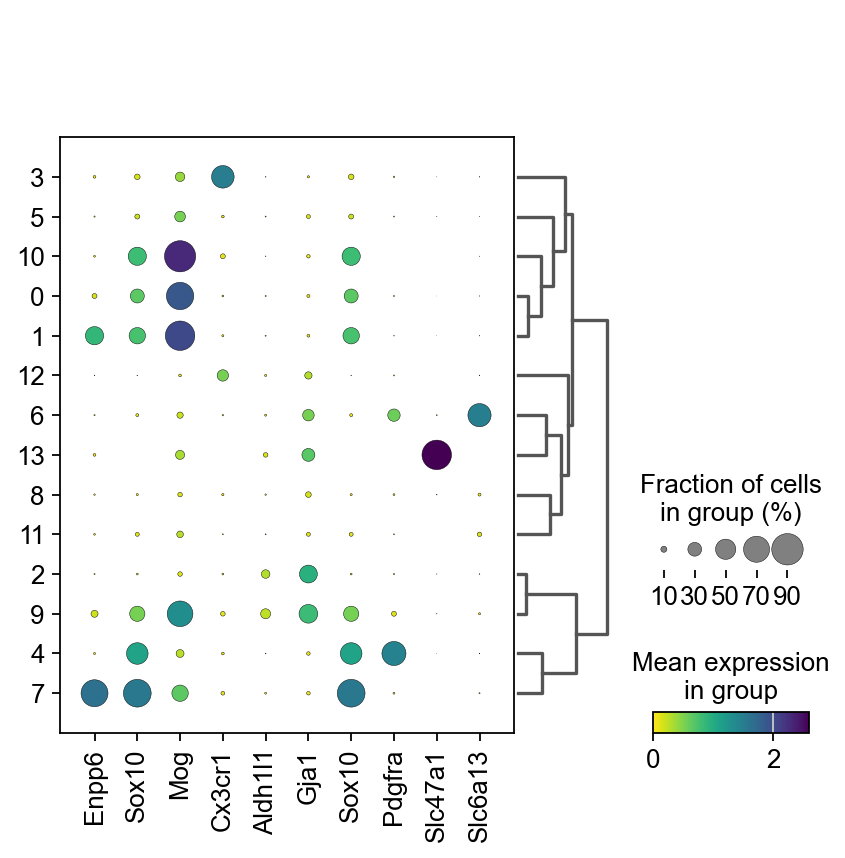

In [35]:
sc.pl.dotplot(non_neuron, marker_non,groupby=["leiden_res_0.80"],cmap='viridis_r',dendrogram=True)

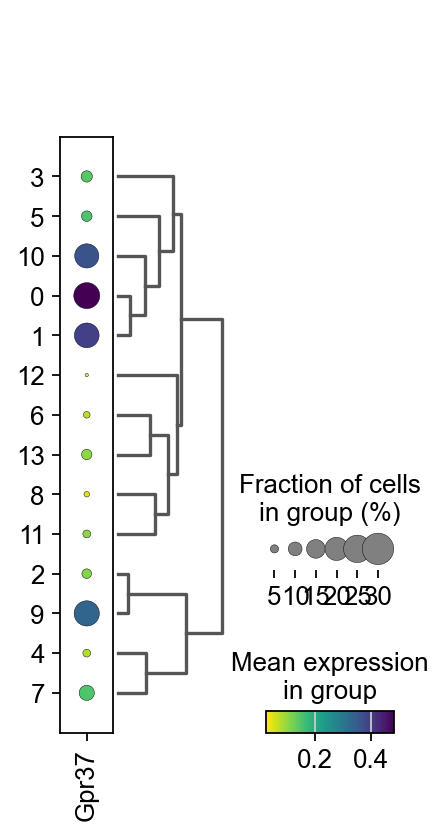

In [36]:
sc.pl.dotplot(non_neuron, 'Gpr37',groupby=["leiden_res_0.80"],cmap='viridis_r',dendrogram=True)

In [42]:
neuron_new = sc.read_h5ad('VTA_neuron_update.h5ad')

In [43]:
neuron_new

AnnData object with n_obs × n_vars = 11906 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'Neuron_merge', 'leiden_res_0.50', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.50', 'Class'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1

In [44]:
neuron_new.obs['Class']

AAACCCAAGACTGTTC-1-VTA_1    GABA-Glut
AAACCCAGTAACGCGA-1-VTA_1         Glut
AAACCCAGTCACTAGT-1-VTA_1    GABA-Glut
AAACGAAAGAGCATTA-1-VTA_1         Dopa
AAACGAAAGGTCACAG-1-VTA_1    GABA-Glut
                              ...    
TTTGTTGGTGTCACAT-1-VTA_2         Glut
TTTGTTGGTTACCTGA-1-VTA_2    GABA-Glut
TTTGTTGGTTCCCACT-1-VTA_2         Glut
TTTGTTGTCACGAACT-1-VTA_2    GABA-Glut
TTTGTTGTCCTCTTTC-1-VTA_2         Glut
Name: Class, Length: 11906, dtype: category
Categories (6, object): ['Dopa', 'GABA', 'GABA-Glut', 'Glut', 'Glut-Sero', 'Non-neuron']

In [49]:
adata.obs

n_genes  percent_mito  n_counts  doublet_score  \
AAACCCAAGACTGTTC-1-VTA_1     2892           0.0    6381.0       0.093149   
AAACCCACATACCGTA-1-VTA_1     1016           0.0    1703.0       0.046853   
AAACCCAGTAACGCGA-1-VTA_1     4184           0.0   10386.0       0.089820   
AAACCCAGTCACTAGT-1-VTA_1     3622           0.0    8986.0       0.032307   
AAACGAAAGAGCATTA-1-VTA_1     1570           0.0    2479.0       0.013114   
...                           ...           ...       ...            ...   
TTTGTTGGTTCCCACT-1-VTA_2     2275           0.0    4429.0       0.039110   
TTTGTTGGTTTAGACC-1-VTA_2     1140           0.0    1956.0       0.012198   
TTTGTTGTCACGAACT-1-VTA_2     4517           0.0   13127.0       0.111898   
TTTGTTGTCAGAGCAG-1-VTA_2     1271           0.0    2199.0       0.019010   
TTTGTTGTCCTCTTTC-1-VTA_2     1334           0.0    2163.0       0.035227   

                          predicted_doublet      Neuron Sample  \
AAACCCAAGACTGTTC-1-VTA_1              False      Neuron  VTA_1   
AAACCCACATACCGTA-1-VTA_1              False  Non-neuron  VTA_1   
AAACCCAGTAACGCGA-1-VTA_1              False      Neuron  VTA_1   
AAACCCAGTCACTAGT-1-VTA_1              False      Neuron  VTA_1   
AAACGAAAGAGCATTA-1-VTA_1              False      Neuron  VTA_1   
...                                     ...         ...    ...   
TTTGTTGGTTCCCACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGGTTTAGACC-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCACGAACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGTCAGAGCAG-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCCTCTTTC-1-VTA_2              False      Neuron  VTA_2   

                         leiden_res_1.00 leiden_res_1.20 Neuron_merge  
AAACCCAAGACTGTTC-1-VTA_1               0               0       Neuron  
AAACCCACATACCGTA-1-VTA_1               1               2   Non-neuron  
AAACCCAGTAACGCGA-1-VTA_1               3               4       Neuron  
AAACCCAGTCACTAGT-1-VTA_1               4               5       Neuron  
AAACGAAAGAGCATTA-1-VTA_1               6              10       Neuron  
...                                  ...             ...          ...  
TTTGTTGGTTCCCACT-1-VTA_2               4               5       Neuron  
TTTGTTGGTTTAGACC-1-VTA_2               7              11   Non-neuron  
TTTGTTGTCACGAACT-1-VTA_2               5               6       Neuron  
TTTGTTGTCAGAGCAG-1-VTA_2               2               3   Non-neuron  
TTTGTTGTCCTCTTTC-1-VTA_2              12              16       Neuron  

[23014 rows x 10 columns]

In [48]:
del adata.obs['leiden_res_0.50']
del adata.obs['leiden_res_0.80']
del adata.obs['leiden_res_1.50']

In [50]:
df = pd.DataFrame()
index = list(neuron_new.obs.index)
Class = list(neuron_new.obs.Class)
df.index = index
df['Class'] = Class
dic = df['Class'].to_dict()

In [51]:
dic

{'AAACCCAAGACTGTTC-1-VTA_1': 'GABA-Glut',
 'AAACCCAGTAACGCGA-1-VTA_1': 'Glut',
 'AAACCCAGTCACTAGT-1-VTA_1': 'GABA-Glut',
 'AAACGAAAGAGCATTA-1-VTA_1': 'Dopa',
 'AAACGAAAGGTCACAG-1-VTA_1': 'GABA-Glut',
 'AAACGAAAGGTCATTC-1-VTA_1': 'GABA-Glut',
 'AAACGAAAGGTTCCAT-1-VTA_1': 'GABA',
 'AAACGAAGTACCGCGT-1-VTA_1': 'GABA',
 'AAACGAAGTACTGAGG-1-VTA_1': 'Dopa',
 'AAACGAATCACACCGG-1-VTA_1': 'Dopa',
 'AAACGAATCTAGCCTC-1-VTA_1': 'Glut',
 'AAACGCTAGAATCGTA-1-VTA_1': 'GABA-Glut',
 'AAACGCTGTGCCGTTG-1-VTA_1': 'Non-neuron',
 'AAACGCTTCAAACCTG-1-VTA_1': 'GABA',
 'AAACGCTTCAAATGAG-1-VTA_1': 'GABA',
 'AAACGCTTCACGATAC-1-VTA_1': 'GABA-Glut',
 'AAAGAACAGCAACAGC-1-VTA_1': 'GABA',
 'AAAGAACCACTAGTAC-1-VTA_1': 'GABA',
 'AAAGGATAGCAGATAT-1-VTA_1': 'GABA-Glut',
 'AAAGGATCACTACGGC-1-VTA_1': 'Glut',
 'AAAGGATGTGACGCCT-1-VTA_1': 'Dopa',
 'AAAGGGCGTCCTACGG-1-VTA_1': 'Dopa',
 'AAAGGGCGTGTCCACG-1-VTA_1': 'Dopa',
 'AAAGGGCTCATTGAGC-1-VTA_1': 'GABA',
 'AAAGGGCTCTACTCAT-1-VTA_1': 'GABA-Glut',
 'AAAGGTAAGCACGTCC-1-VTA_1': 

In [52]:
Class_new = []
for i in range(adata.shape[0]):
    if adata.obs.index[i] in dic.keys():
        Class_new.append(dic[adata.obs.index[i]])
    else: 
        Class_new.append('Non-neuron')
adata.obs['Class_new'] = Class_new

In [57]:
adata.obs['Class_new']

AAACCCAAGACTGTTC-1-VTA_1     GABA-Glut
AAACCCACATACCGTA-1-VTA_1    Non-neuron
AAACCCAGTAACGCGA-1-VTA_1          Glut
AAACCCAGTCACTAGT-1-VTA_1     GABA-Glut
AAACGAAAGAGCATTA-1-VTA_1          Dopa
                               ...    
TTTGTTGGTTCCCACT-1-VTA_2          Glut
TTTGTTGGTTTAGACC-1-VTA_2    Non-neuron
TTTGTTGTCACGAACT-1-VTA_2     GABA-Glut
TTTGTTGTCAGAGCAG-1-VTA_2    Non-neuron
TTTGTTGTCCTCTTTC-1-VTA_2          Glut
Name: Class_new, Length: 23014, dtype: category
Categories (6, object): ['Dopa', 'GABA', 'GABA-Glut', 'Glut', 'Glut-Sero', 'Non-neuron']

In [54]:
adata.write('VTA_allcell_merge_harmony.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 23014 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_1.00', 'leiden_res_1.20', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', '

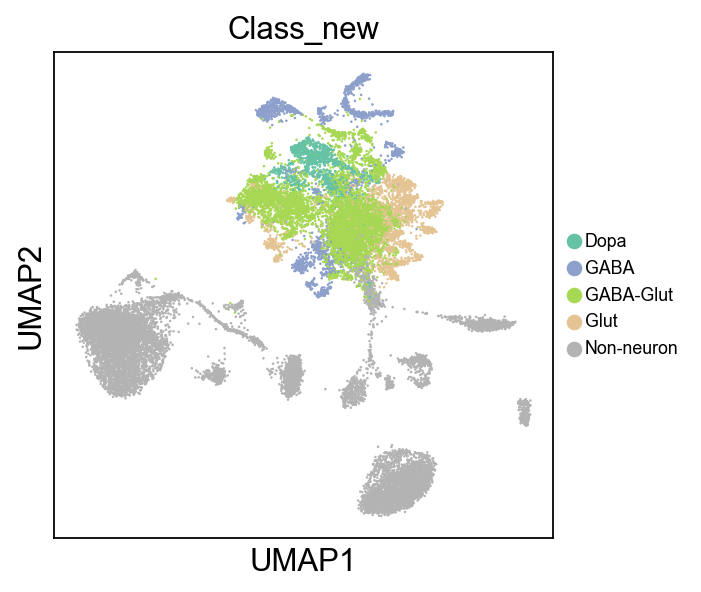

In [62]:
sc.pl.umap(
    adata,
    color="Class_new",
    legend_fontsize=8,save = 'allcell_merge_class_new.pdf',palette= 'Set2'
)

In [7]:
adata = adata[adata.obs['Class_new'].isin (['Dopa', 'GABA', 'GABA-Glut', 'Glut', 'Non-neuron']),:]

In [8]:
adata

View of AnnData object with n_obs × n_vars = 22748 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_1.00', 'leiden_res_1.20', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 

In [61]:
Class_counts = adata.obs['Class_new'].value_counts()
print(Class_counts)

Class_new
Non-neuron    11685
GABA-Glut      6169
Glut           2038
GABA           1771
Dopa           1085
Name: count, dtype: int64


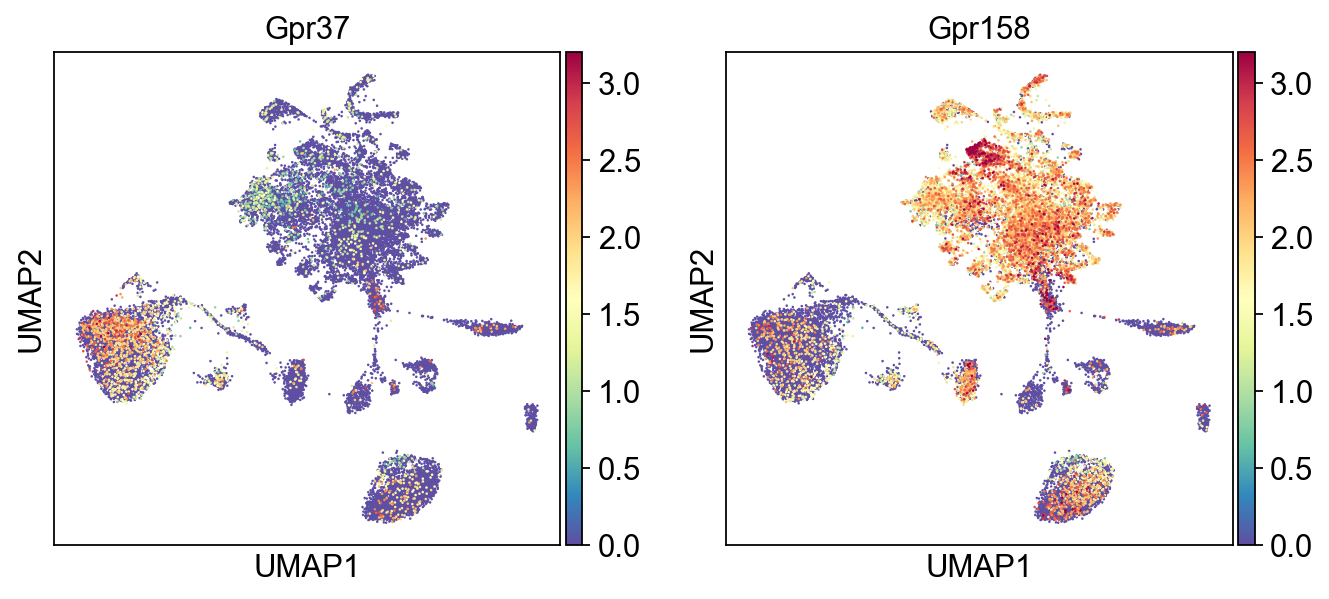

In [63]:
sc.pl.umap(
    adata,
    color=["Gpr37", "Gpr158"],
    legend_fontsize=8,vmax = 3.2,cmap='Spectral_r',save = 'allcell_merge_gpr37_158.pdf'
)

In [64]:
marker_gene_class_new = ['Gpr37','Gpr158','Slc17a6','Slc17a7','Slc17a8','Snap25','Slc32a1','Gad1','Gad2','Aldh1a1','Slc6a5','Chat','Slc6a3','Slc18a2','Th','Ddc','Slc6a4','Hdc']

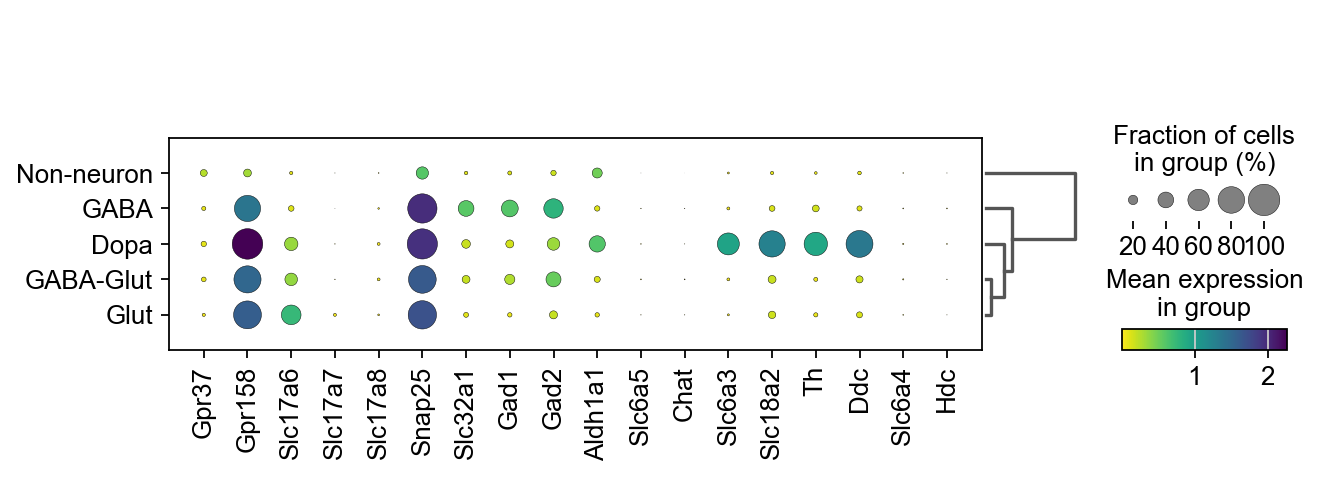

In [67]:
sc.pl.dotplot(adata,marker_gene_class_new , 'Class_new',cmap='viridis_r',dendrogram=True,save = '_class_new.pdf')

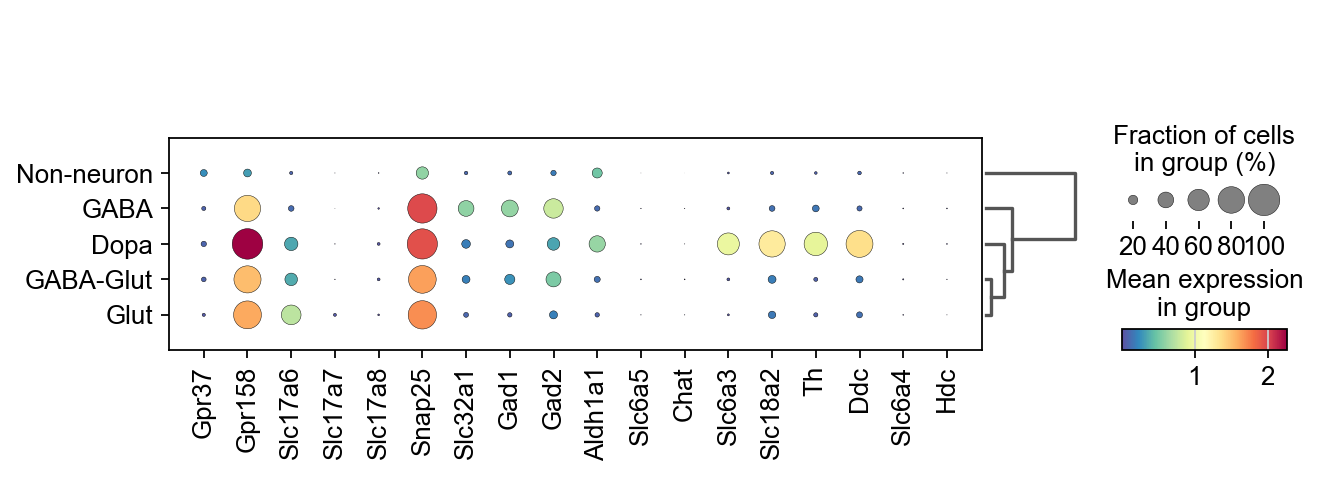

In [71]:
sc.pl.dotplot(adata,marker_gene_class_new , 'Class_new',cmap='Spectral_r',dendrogram=True,save = '_class_new_.pdf')

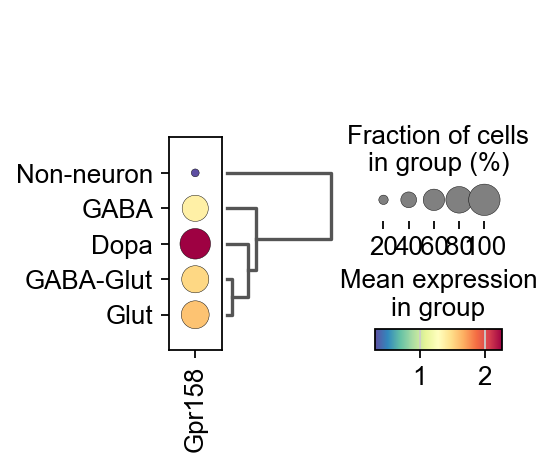

In [70]:
sc.pl.dotplot(adata,'Gpr158' , 'Class_new',cmap='Spectral_r',dendrogram=True,save = '_Gpr158_class_new.pdf')

/opt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


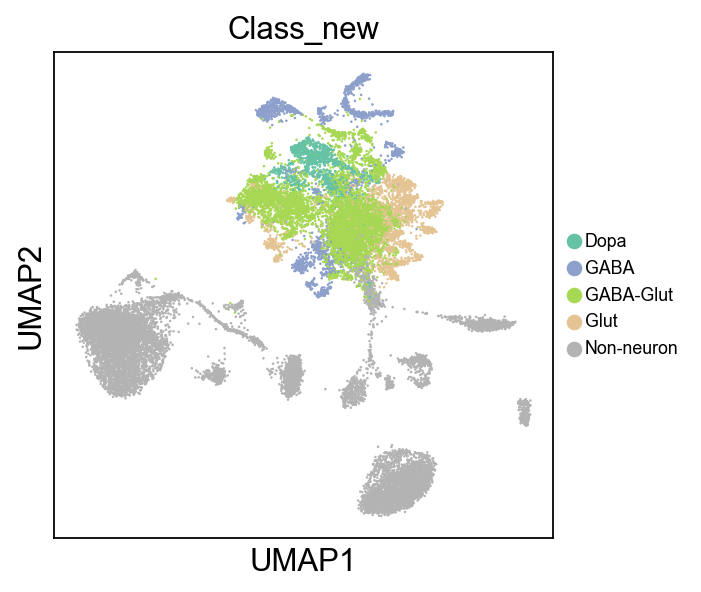

In [9]:
sc.pl.umap(
    adata,
    color="Class_new",
    legend_fontsize=8,palette= 'Set2'
)

In [10]:
adata.write('VTA_allcell_merge_harmony.h5ad')

In [11]:
gaba = adata[adata.obs['Class_new'].isin (['GABA','GABA-Glut']),:]

In [12]:
gaba

View of AnnData object with n_obs × n_vars = 7940 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_1.00', 'leiden_res_1.20', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', '

/opt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


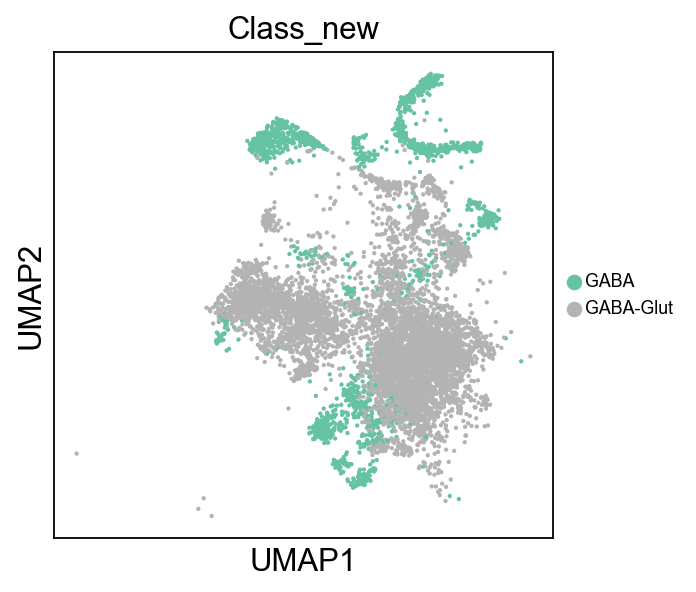

In [13]:
sc.pl.umap(
    gaba,
    color="Class_new",
    legend_fontsize=8,palette= 'Set2'
)

In [14]:
gaba.write('VTA_GABA_mix.h5ad')

In [2]:
adata=sc.read_h5ad('VTA_allcell_merge_harmony.h5ad')

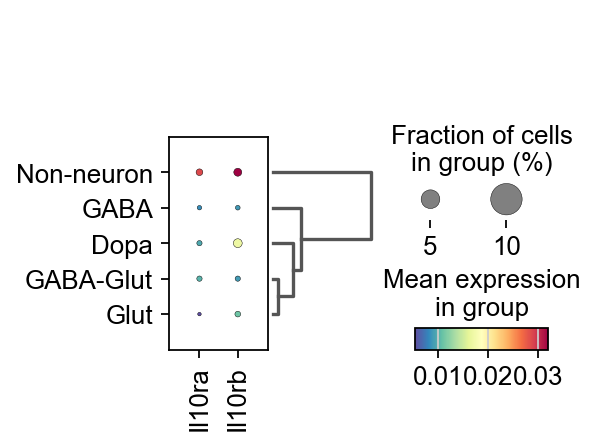

In [9]:
sc.pl.dotplot(adata,['Il10ra','Il10rb'] , 'Class_new',cmap='Spectral_r',dendrogram=True)

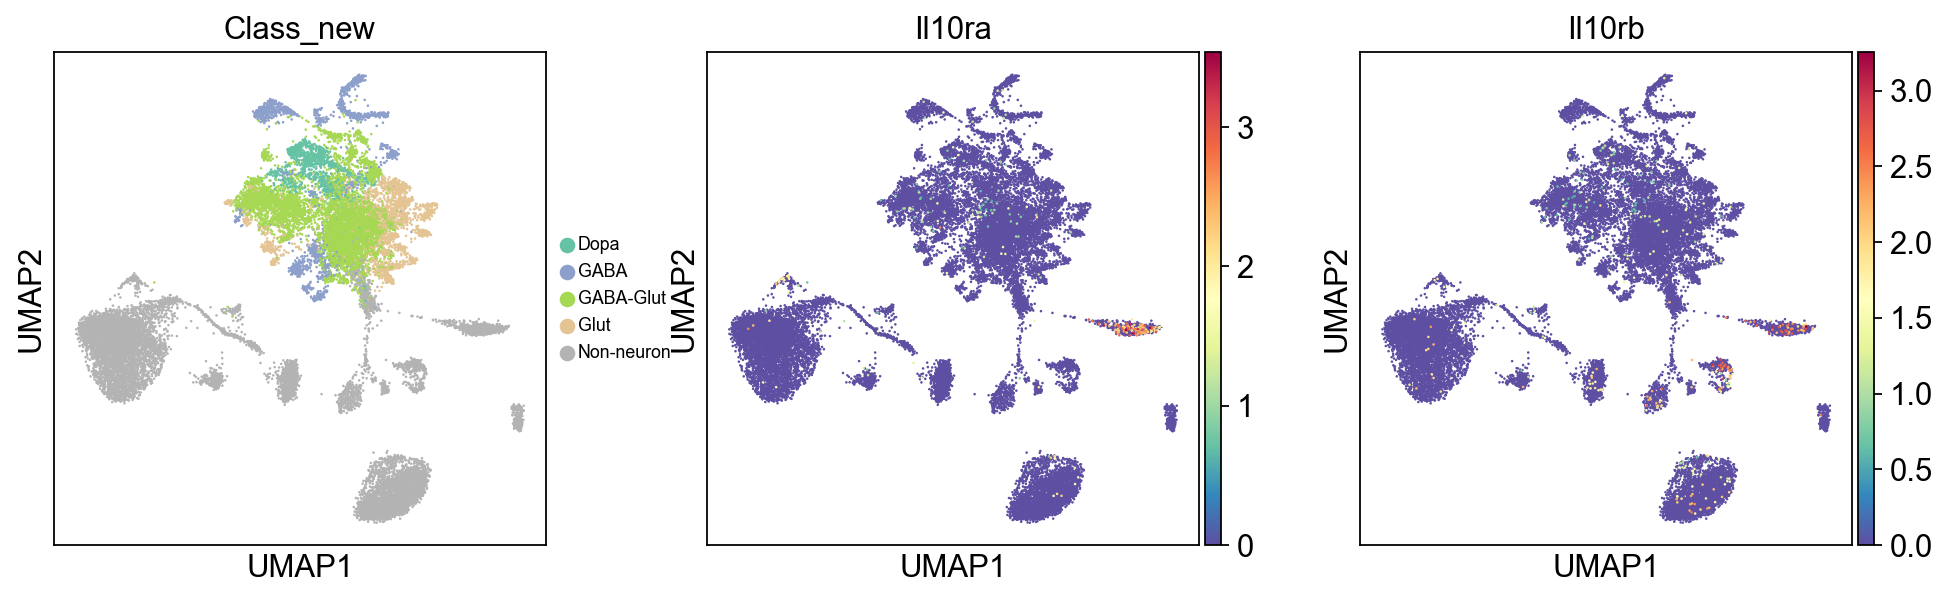

In [8]:
sc.pl.umap(
    adata,
    color=['Class_new','Il10ra','Il10rb'],
    legend_fontsize=8,cmap='Spectral_r'
)

In [7]:
adata.obs

n_genes  percent_mito  n_counts  doublet_score  \
AAACCCAAGACTGTTC-1-VTA_1     2892           0.0    6381.0       0.093149   
AAACCCACATACCGTA-1-VTA_1     1016           0.0    1703.0       0.046853   
AAACCCAGTAACGCGA-1-VTA_1     4184           0.0   10386.0       0.089820   
AAACCCAGTCACTAGT-1-VTA_1     3622           0.0    8986.0       0.032307   
AAACGAAAGAGCATTA-1-VTA_1     1570           0.0    2479.0       0.013114   
...                           ...           ...       ...            ...   
TTTGTTGGTTCCCACT-1-VTA_2     2275           0.0    4429.0       0.039110   
TTTGTTGGTTTAGACC-1-VTA_2     1140           0.0    1956.0       0.012198   
TTTGTTGTCACGAACT-1-VTA_2     4517           0.0   13127.0       0.111898   
TTTGTTGTCAGAGCAG-1-VTA_2     1271           0.0    2199.0       0.019010   
TTTGTTGTCCTCTTTC-1-VTA_2     1334           0.0    2163.0       0.035227   

                          predicted_doublet      Neuron Sample  \
AAACCCAAGACTGTTC-1-VTA_1              False      Neuron  VTA_1   
AAACCCACATACCGTA-1-VTA_1              False  Non-neuron  VTA_1   
AAACCCAGTAACGCGA-1-VTA_1              False      Neuron  VTA_1   
AAACCCAGTCACTAGT-1-VTA_1              False      Neuron  VTA_1   
AAACGAAAGAGCATTA-1-VTA_1              False      Neuron  VTA_1   
...                                     ...         ...    ...   
TTTGTTGGTTCCCACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGGTTTAGACC-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCACGAACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGTCAGAGCAG-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCCTCTTTC-1-VTA_2              False      Neuron  VTA_2   

                         leiden_res_1.00 leiden_res_1.20 Neuron_merge  \
AAACCCAAGACTGTTC-1-VTA_1               0               0       Neuron   
AAACCCACATACCGTA-1-VTA_1               1               2   Non-neuron   
AAACCCAGTAACGCGA-1-VTA_1               3               4       Neuron   
AAACCCAGTCACTAGT-1-VTA_1               4               5       Neuron   
AAACGAAAGAGCATTA-1-VTA_1               6              10       Neuron   
...                                  ...             ...          ...   
TTTGTTGGTTCCCACT-1-VTA_2               4               5       Neuron   
TTTGTTGGTTTAGACC-1-VTA_2               7              11   Non-neuron   
TTTGTTGTCACGAACT-1-VTA_2               5               6       Neuron   
TTTGTTGTCAGAGCAG-1-VTA_2               2               3   Non-neuron   
TTTGTTGTCCTCTTTC-1-VTA_2              12              16       Neuron   

                           Class_new  
AAACCCAAGACTGTTC-1-VTA_1   GABA-Glut  
AAACCCACATACCGTA-1-VTA_1  Non-neuron  
AAACCCAGTAACGCGA-1-VTA_1        Glut  
AAACCCAGTCACTAGT-1-VTA_1   GABA-Glut  
AAACGAAAGAGCATTA-1-VTA_1        Dopa  
...                              ...  
TTTGTTGGTTCCCACT-1-VTA_2        Glut  
TTTGTTGGTTTAGACC-1-VTA_2  Non-neuron  
TTTGTTGTCACGAACT-1-VTA_2   GABA-Glut  
TTTGTTGTCAGAGCAG-1-VTA_2  Non-neuron  
TTTGTTGTCCTCTTTC-1-VTA_2        Glut  

[22748 rows x 11 columns]

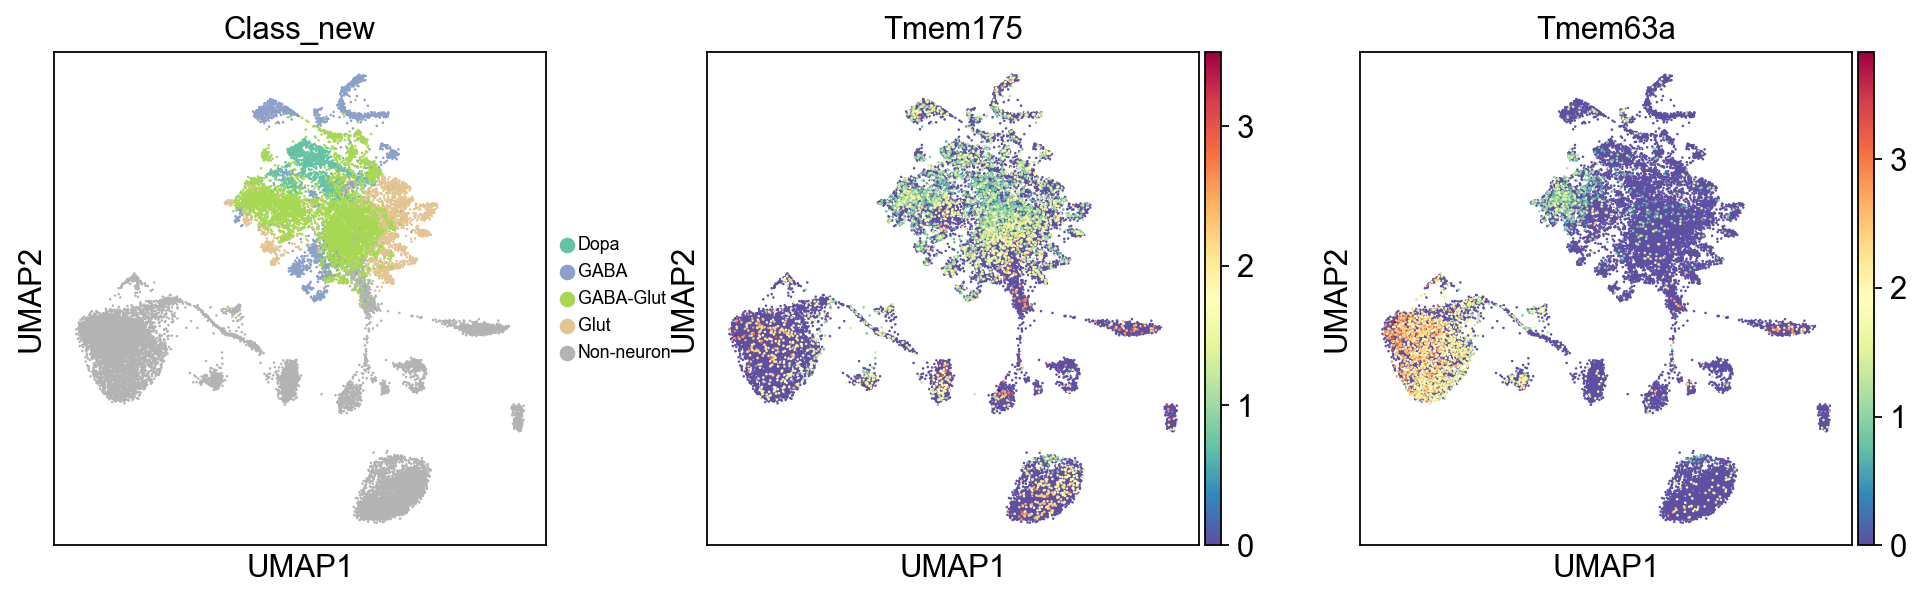

In [3]:
sc.pl.umap(
    adata,
    color=['Class_new','Tmem175','Tmem63a'],
    legend_fontsize=8,cmap='Spectral_r'
)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Class_new']`


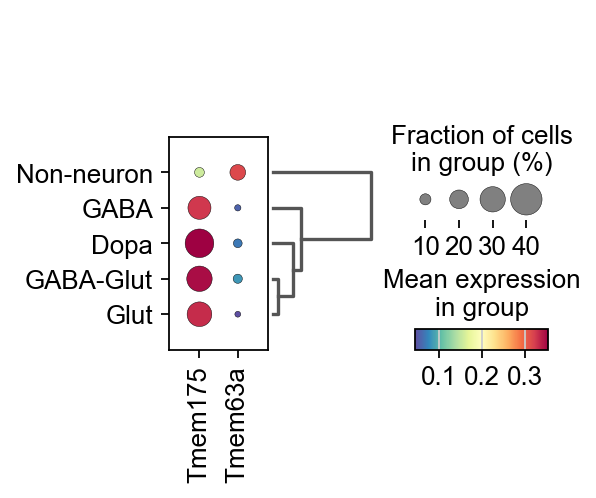

In [4]:
sc.pl.dotplot(adata,['Tmem175','Tmem63a'] , 'Class_new',cmap='Spectral_r',dendrogram=True)

In [5]:
adata.obs

n_genes  percent_mito  n_counts  doublet_score  \
AAACCCAAGACTGTTC-1-VTA_1     2892           0.0    6381.0       0.093149   
AAACCCACATACCGTA-1-VTA_1     1016           0.0    1703.0       0.046853   
AAACCCAGTAACGCGA-1-VTA_1     4184           0.0   10386.0       0.089820   
AAACCCAGTCACTAGT-1-VTA_1     3622           0.0    8986.0       0.032307   
AAACGAAAGAGCATTA-1-VTA_1     1570           0.0    2479.0       0.013114   
...                           ...           ...       ...            ...   
TTTGTTGGTTCCCACT-1-VTA_2     2275           0.0    4429.0       0.039110   
TTTGTTGGTTTAGACC-1-VTA_2     1140           0.0    1956.0       0.012198   
TTTGTTGTCACGAACT-1-VTA_2     4517           0.0   13127.0       0.111898   
TTTGTTGTCAGAGCAG-1-VTA_2     1271           0.0    2199.0       0.019010   
TTTGTTGTCCTCTTTC-1-VTA_2     1334           0.0    2163.0       0.035227   

                          predicted_doublet      Neuron Sample  \
AAACCCAAGACTGTTC-1-VTA_1              False      Neuron  VTA_1   
AAACCCACATACCGTA-1-VTA_1              False  Non-neuron  VTA_1   
AAACCCAGTAACGCGA-1-VTA_1              False      Neuron  VTA_1   
AAACCCAGTCACTAGT-1-VTA_1              False      Neuron  VTA_1   
AAACGAAAGAGCATTA-1-VTA_1              False      Neuron  VTA_1   
...                                     ...         ...    ...   
TTTGTTGGTTCCCACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGGTTTAGACC-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCACGAACT-1-VTA_2              False      Neuron  VTA_2   
TTTGTTGTCAGAGCAG-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCCTCTTTC-1-VTA_2              False      Neuron  VTA_2   

                         leiden_res_1.00 leiden_res_1.20 Neuron_merge  \
AAACCCAAGACTGTTC-1-VTA_1               0               0       Neuron   
AAACCCACATACCGTA-1-VTA_1               1               2   Non-neuron   
AAACCCAGTAACGCGA-1-VTA_1               3               4       Neuron   
AAACCCAGTCACTAGT-1-VTA_1               4               5       Neuron   
AAACGAAAGAGCATTA-1-VTA_1               6              10       Neuron   
...                                  ...             ...          ...   
TTTGTTGGTTCCCACT-1-VTA_2               4               5       Neuron   
TTTGTTGGTTTAGACC-1-VTA_2               7              11   Non-neuron   
TTTGTTGTCACGAACT-1-VTA_2               5               6       Neuron   
TTTGTTGTCAGAGCAG-1-VTA_2               2               3   Non-neuron   
TTTGTTGTCCTCTTTC-1-VTA_2              12              16       Neuron   

                           Class_new  
AAACCCAAGACTGTTC-1-VTA_1   GABA-Glut  
AAACCCACATACCGTA-1-VTA_1  Non-neuron  
AAACCCAGTAACGCGA-1-VTA_1        Glut  
AAACCCAGTCACTAGT-1-VTA_1   GABA-Glut  
AAACGAAAGAGCATTA-1-VTA_1        Dopa  
...                              ...  
TTTGTTGGTTCCCACT-1-VTA_2        Glut  
TTTGTTGGTTTAGACC-1-VTA_2  Non-neuron  
TTTGTTGTCACGAACT-1-VTA_2   GABA-Glut  
TTTGTTGTCAGAGCAG-1-VTA_2  Non-neuron  
TTTGTTGTCCTCTTTC-1-VTA_2        Glut  

[22748 rows x 11 columns]

In [16]:
non_neuron = adata[adata.obs['Class_new'] == 'Non-neuron',:]

In [7]:
non_neuron.obs

n_genes  percent_mito  n_counts  doublet_score  \
AAACCCACATACCGTA-1-VTA_1     1016           0.0    1703.0       0.046853   
AAACGAAAGGTAAGGA-1-VTA_1      902           0.0    1472.0       0.009311   
AAACGAACAACGGGTA-1-VTA_1      922           0.0    1269.0       0.003303   
AAACGAACAGTTAGGG-1-VTA_1      879           0.0    1509.0       0.057174   
AAACGAATCCCGTAAA-1-VTA_1     1069           0.0    1714.0       0.048170   
...                           ...           ...       ...            ...   
TTTGTTGCATCGTCCT-1-VTA_2      821           0.0    1154.0       0.003590   
TTTGTTGGTCCTTGTC-1-VTA_2      777           0.0    1112.0       0.013088   
TTTGTTGGTCTTGAGT-1-VTA_2      829           0.0    1210.0       0.021540   
TTTGTTGGTTTAGACC-1-VTA_2     1140           0.0    1956.0       0.012198   
TTTGTTGTCAGAGCAG-1-VTA_2     1271           0.0    2199.0       0.019010   

                          predicted_doublet      Neuron Sample  \
AAACCCACATACCGTA-1-VTA_1              False  Non-neuron  VTA_1   
AAACGAAAGGTAAGGA-1-VTA_1              False  Non-neuron  VTA_1   
AAACGAACAACGGGTA-1-VTA_1              False  Non-neuron  VTA_1   
AAACGAACAGTTAGGG-1-VTA_1              False  Non-neuron  VTA_1   
AAACGAATCCCGTAAA-1-VTA_1              False  Non-neuron  VTA_1   
...                                     ...         ...    ...   
TTTGTTGCATCGTCCT-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGGTCCTTGTC-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGGTCTTGAGT-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGGTTTAGACC-1-VTA_2              False  Non-neuron  VTA_2   
TTTGTTGTCAGAGCAG-1-VTA_2              False  Non-neuron  VTA_2   

                         leiden_res_1.00 leiden_res_1.20 Neuron_merge  \
AAACCCACATACCGTA-1-VTA_1               1               2   Non-neuron   
AAACGAAAGGTAAGGA-1-VTA_1               7              11   Non-neuron   
AAACGAACAACGGGTA-1-VTA_1              10              14   Non-neuron   
AAACGAACAGTTAGGG-1-VTA_1               1               2   Non-neuron   
AAACGAATCCCGTAAA-1-VTA_1               1               2   Non-neuron   
...                                  ...             ...          ...   
TTTGTTGCATCGTCCT-1-VTA_2              13              17   Non-neuron   
TTTGTTGGTCCTTGTC-1-VTA_2               7              11   Non-neuron   
TTTGTTGGTCTTGAGT-1-VTA_2               7              11   Non-neuron   
TTTGTTGGTTTAGACC-1-VTA_2               7              11   Non-neuron   
TTTGTTGTCAGAGCAG-1-VTA_2               2               3   Non-neuron   

                           Class_new  
AAACCCACATACCGTA-1-VTA_1  Non-neuron  
AAACGAAAGGTAAGGA-1-VTA_1  Non-neuron  
AAACGAACAACGGGTA-1-VTA_1  Non-neuron  
AAACGAACAGTTAGGG-1-VTA_1  Non-neuron  
AAACGAATCCCGTAAA-1-VTA_1  Non-neuron  
...                              ...  
TTTGTTGCATCGTCCT-1-VTA_2  Non-neuron  
TTTGTTGGTCCTTGTC-1-VTA_2  Non-neuron  
TTTGTTGGTCTTGAGT-1-VTA_2  Non-neuron  
TTTGTTGGTTTAGACC-1-VTA_2  Non-neuron  
TTTGTTGTCAGAGCAG-1-VTA_2  Non-neuron  

[11685 rows x 11 columns]

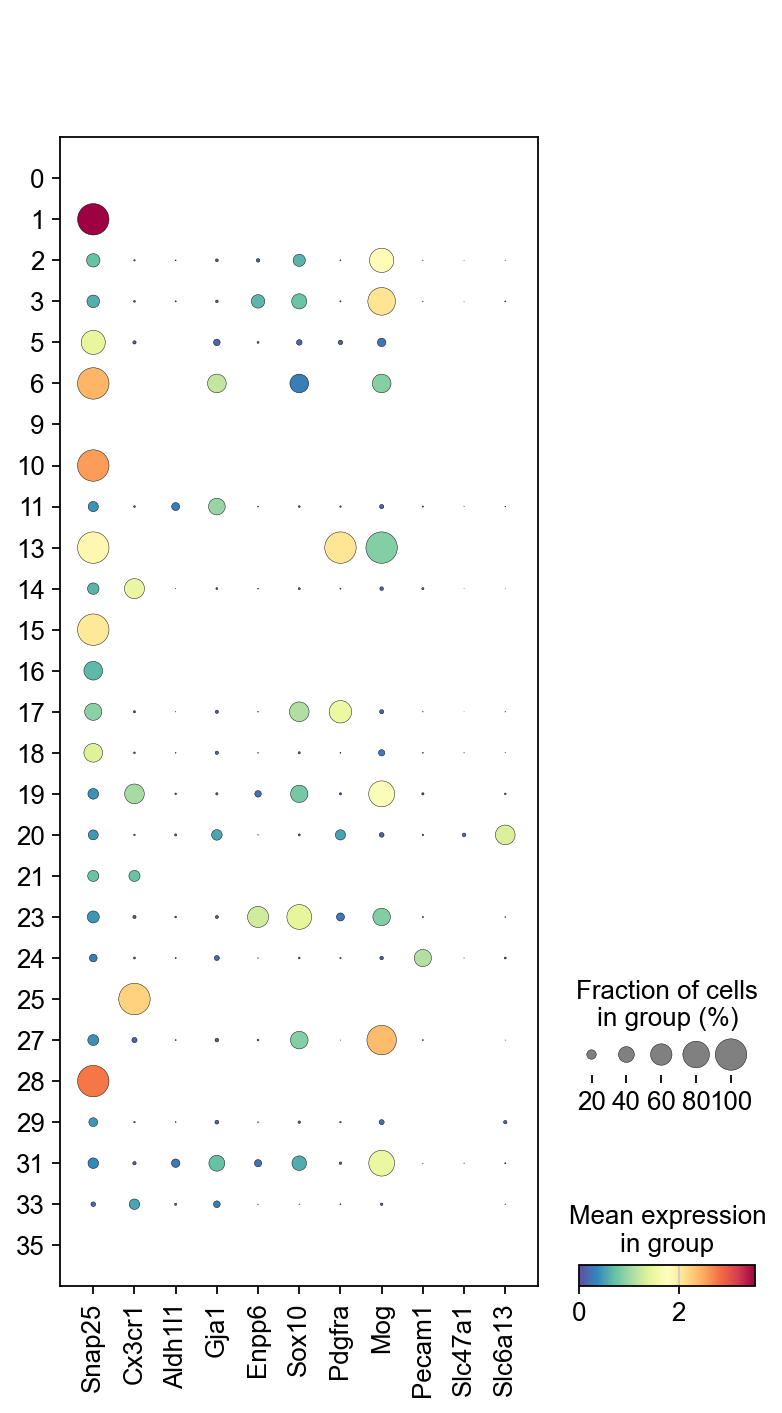

In [9]:
sc.pl.dotplot(non_neuron,['Snap25','Cx3cr1','Aldh1l1','Gja1','Enpp6','Sox10','Pdgfra','Mog','Pecam1','Slc47a1','Slc6a13'] , 'leiden_res_1.20',cmap='Spectral_r')

In [10]:
set(non_neuron.obs['leiden_res_1.20'])

{'0',
 '1',
 '10',
 '11',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '25',
 '27',
 '28',
 '29',
 '3',
 '31',
 '33',
 '35',
 '5',
 '6',
 '9'}

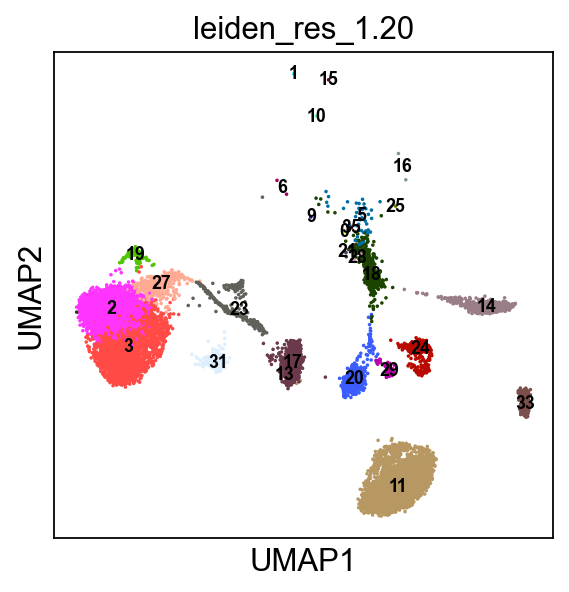

In [17]:
sc.pl.umap(
    non_neuron,
    color=['leiden_res_1.20'],
    legend_fontsize=8,cmap='Spectral_r',legend_loc="on data",
)

In [20]:
test = non_neuron[non_neuron.obs['leiden_res_1.20'] == '18',:]

In [21]:
test

View of AnnData object with n_obs × n_vars = 515 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_1.00', 'leiden_res_1.20', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_new_colors', 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_colo

In [22]:
non_neuron = non_neuron[non_neuron.obs['leiden_res_1.20'].isin (['19','2','3','27','31','23','17','13','11','20','29','24','33','14','18']),:]

In [23]:
non_neuron

View of AnnData object with n_obs × n_vars = 11628 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'leiden_res_1.00', 'leiden_res_1.20', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_new_colors', 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.20', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'leiden_res_1.50', 'leiden_res_1.50_co

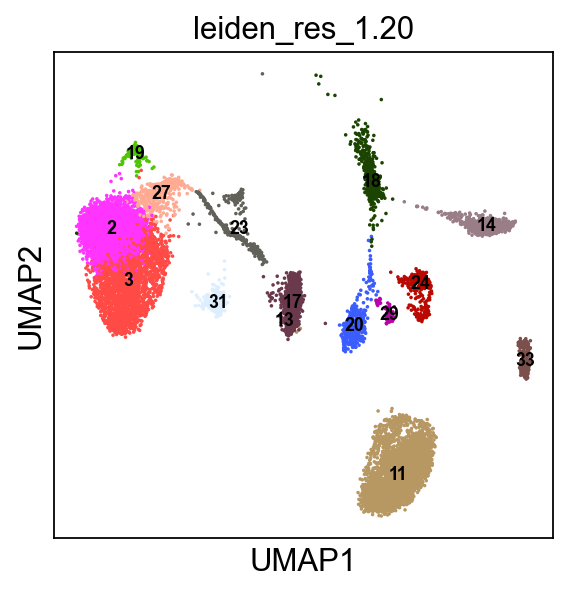

In [24]:
sc.pl.umap(
    non_neuron,
    color=['leiden_res_1.20'],
    legend_fontsize=8,cmap='Spectral_r',legend_loc="on data",
)

In [28]:
sc.tl.dendrogram(non_neuron,'leiden_res_1.20')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_1.20']`


/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:190: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat


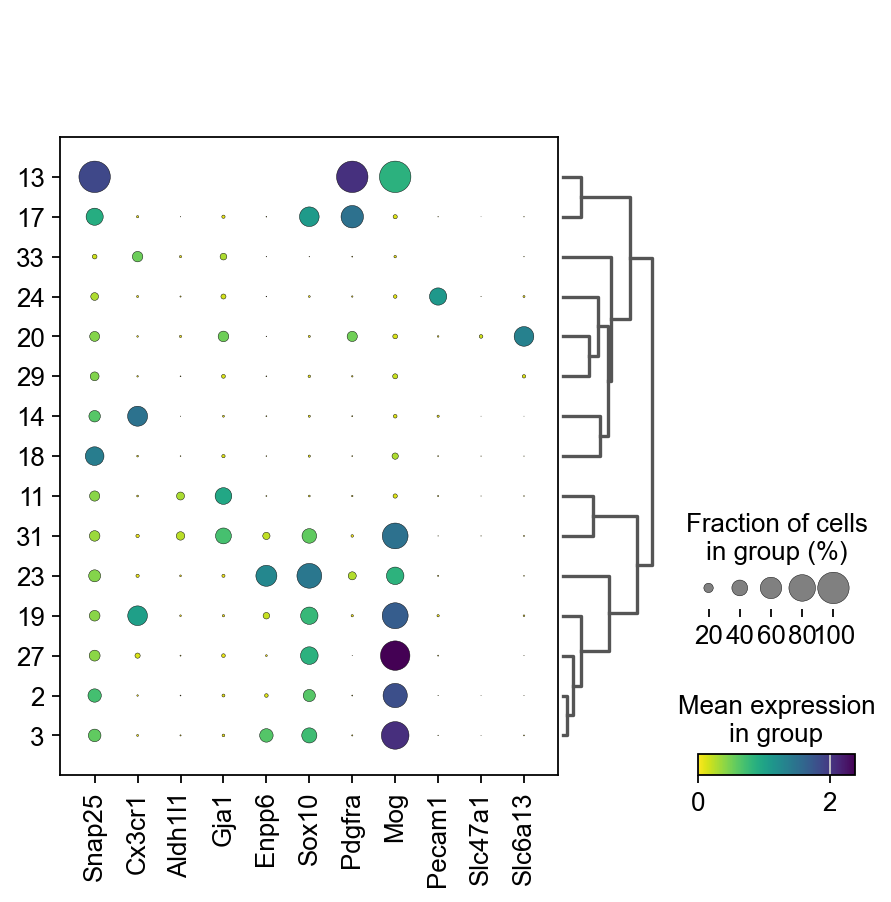

In [29]:
sc.pl.dotplot(non_neuron,['Snap25','Cx3cr1','Aldh1l1','Gja1','Enpp6','Sox10','Pdgfra','Mog','Pecam1','Slc47a1','Slc6a13'] , 'leiden_res_1.20',cmap='viridis_r',dendrogram=True)

In [33]:
Type = []
for i in range(non_neuron. shape[0]):
    if (int(non_neuron.obs['leiden_res_1.20'][i]) in (33,14,19)): Type.append('Microglia')
    elif (int(non_neuron.obs['leiden_res_1.20'][i]) in (11,31)): Type.append('Astrocytes')
    elif (int(non_neuron. obs['leiden_res_1.20'][i]) in (23,19,27,2,3)): Type.append('0ligodendrocytes')
    elif (int(non_neuron.obs['leiden_res_1.20'][i]) in (13,17)): Type.append('OPCs')
    elif (int(non_neuron.obs['leiden_res_1.20'][i]) == 24): Type.append(' Endothelia')
    elif (int(non_neuron.obs['leiden_res_1.20'][i]) == 20): Type.append('VLMCs')
    else: Type.append('Other')
non_neuron.obs['Type'] = Type

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_28924/3359592947.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (int(non_neuron.obs['leiden_res_1.20'][i]) in (33,14,19)): Type.append('Microglia')
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_28924/3359592947.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (int(non_neuron.obs['leiden_res_1.20'][i]) in (11,31)): Type.append('Astrocytes')
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_28924/3359592947.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys wi

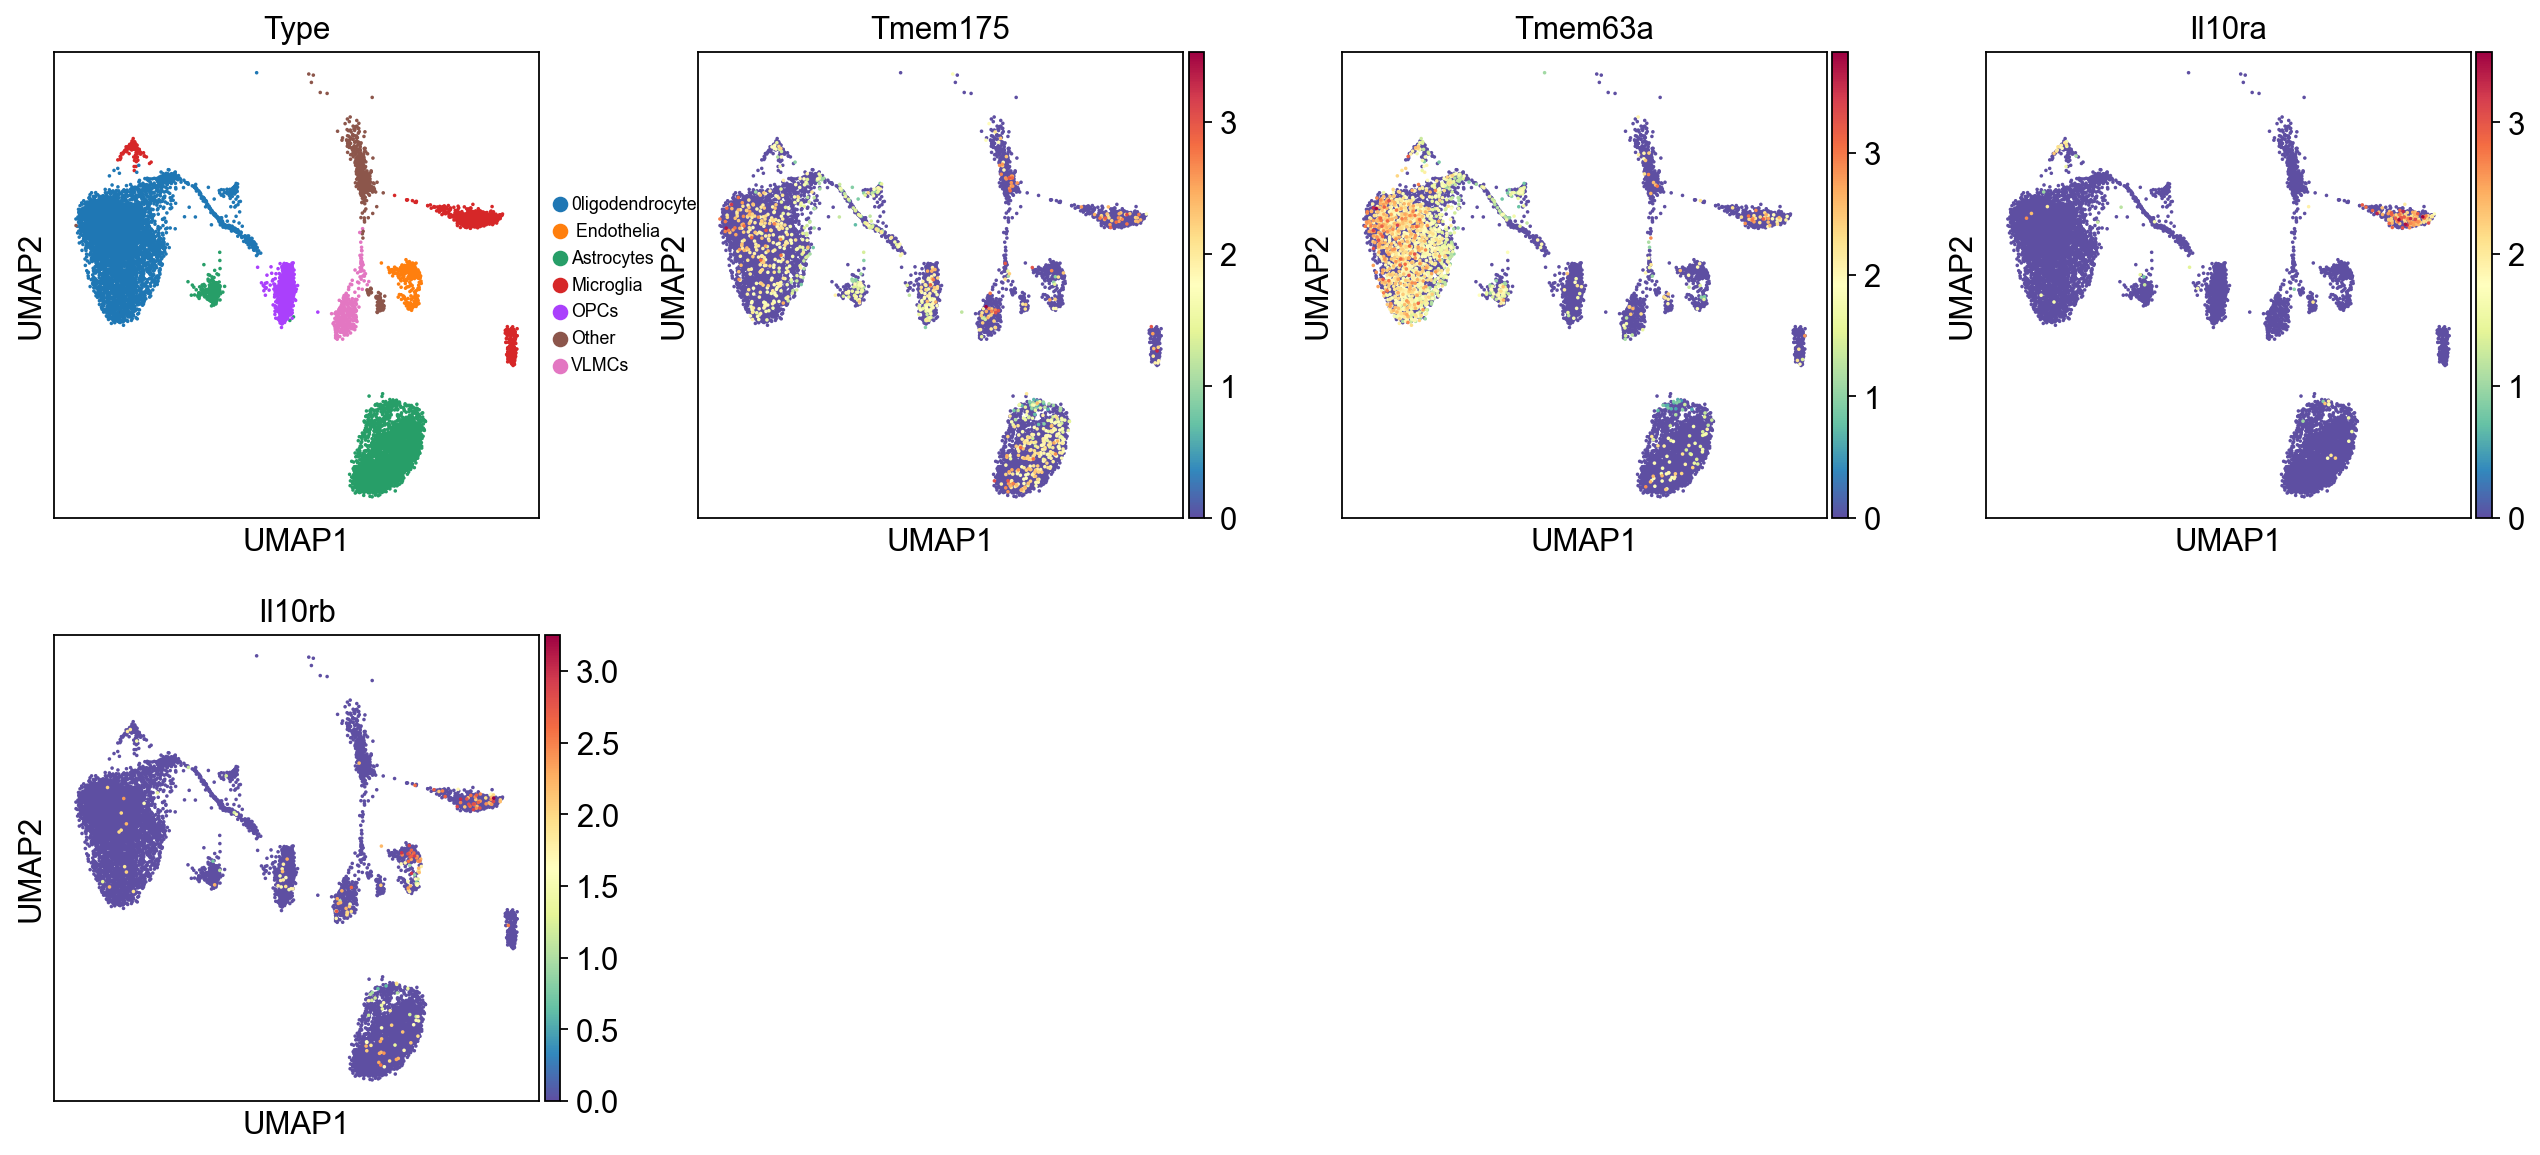

In [34]:
sc.pl.umap(
    non_neuron,
    color=['Type','Tmem175','Tmem63a','Il10ra','Il10rb'],
    legend_fontsize=8,cmap='Spectral_r',
)

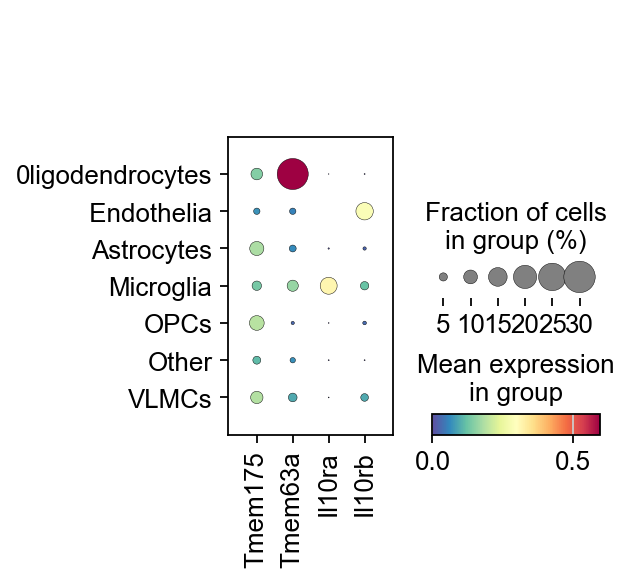

In [38]:
sc.pl.dotplot(non_neuron,['Tmem175','Tmem63a','Il10ra','Il10rb'] , 'Type',cmap='Spectral_r')